In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import acos, degrees
from scipy.signal import find_peaks
import os.path
import glob
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import entropy
import pylab as pl
from numpy.fft import fft
from scipy import stats
import numpy
from scipy import signal
from scipy.signal import lfilter, lfilter_zi, filtfilt, butter
import matplotlib.patches as mpatches

In [2]:
chunk_width = 200
#centr_rang = 110

In [3]:
#Function to extract angle using 3 points coordinate
def angle3pt(a, b, c):
#    """Counterclockwise angle in degrees by turning from c to a around b
#        Returns a float between 0.0 and 360.0"""
    ang = math.degrees(
    math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
    return ang + 360 if ang < 0 else ang


In [4]:
def getridofAngleJumps(alpha):
    alpha_rad = [x*(np.pi)/180 for x in alpha]
    alpha_rad = np.array(alpha_rad)
    alpha_rad[~np.isnan(alpha_rad)] = np.unwrap(alpha_rad[~np.isnan(alpha_rad)])
    alpha_unwrap= np.degrees(alpha_rad)
    return alpha_unwrap

In [5]:
def smooth_acausal(x,frequency = 0.300):
    #b, a = signal.butter(8, 0.150)
    sos = signal.butter(4, frequency, output='sos')
    y = signal.sosfiltfilt(sos, x)
    return y


In [6]:
def smooth(x,window_len=1,window='hanning'):
#    """smooth the data using a window with requested size.

    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y


In [7]:
#Function to extract RidgeX trajectory from excel file
def RidgeX_excel_to_array_preprocessed(file_path, chunk_width, trial_no):
    #Read csv file tail markers
    RidgeX = pd.read_csv(file_path[trial_no])

    #take just numeric values
    RidgeX=pd.to_numeric(RidgeX.iloc[:,0])

 
    return smooth(RidgeX.values)


In [8]:
#Function to plot tail angle trajectory
def plot_TailAngle(file_path, chunk_width, i, c):
    #Read csv file tail markers
    df = pd.read_csv(file_path[i])
#    df = pd.read_csv(file_path)
    #Rename marker columns
    df.rename(columns={'DLC_resnet50_Ridge_walkMay27shuffle1_1000000':'tail1_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.1':'tail1_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.2':'tail1_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.3':'tail2_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.4':'tail2_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.5':'tail2_lik',                       
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.6':'tail3_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.7':'tail3_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.8':'tail3_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.9':'tail4_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.10':'tail4_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.11':'tail4_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.12':'tail5_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.13':'tail5_y',                       
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.14':'tail5_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.15':'tail6_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.16':'tail6_y',  
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.17':'tail6_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.18':'tail7_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.19':'tail7_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.20':'tail7_lik',                       
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.21':'tail8_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.22':'tail8_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.23':'tail8_lik'}, 
                 inplace=True)

    #take just numeric values
    df.tail1_x=pd.to_numeric(df.tail1_x[c-chunk_width:c+chunk_width])
    df.tail1_y=pd.to_numeric(df.tail1_y[c-chunk_width:c+chunk_width])
    df.tail1_lik=pd.to_numeric(df.tail1_lik[c-chunk_width:c+chunk_width])
    df.tail2_x=pd.to_numeric(df.tail2_x[c-chunk_width:c+chunk_width])
    df.tail2_y=pd.to_numeric(df.tail2_y[c-chunk_width:c+chunk_width])
    df.tail2_lik=pd.to_numeric(df.tail2_lik[c-chunk_width:c+chunk_width])
    df.tail3_x=pd.to_numeric(df.tail3_x[c-chunk_width:c+chunk_width])
    df.tail3_y=pd.to_numeric(df.tail3_y[c-chunk_width:c+chunk_width])
    df.tail3_lik=pd.to_numeric(df.tail3_lik[c-chunk_width:c+chunk_width])
    df.tail4_x=pd.to_numeric(df.tail4_x[c-chunk_width:c+chunk_width])
    df.tail4_y=pd.to_numeric(df.tail4_y[c-chunk_width:c+chunk_width])
    df.tail4_lik=pd.to_numeric(df.tail4_lik[c-chunk_width:c+chunk_width])
    df.tail5_x=pd.to_numeric(df.tail5_x[c-chunk_width:c+chunk_width])
    df.tail5_y=pd.to_numeric(df.tail5_y[c-chunk_width:c+chunk_width])
    df.tail5_lik=pd.to_numeric(df.tail5_lik[c-chunk_width:c+chunk_width])
    df.tail6_x=pd.to_numeric(df.tail6_x[c-chunk_width:c+chunk_width])
    df.tail6_y=pd.to_numeric(df.tail6_y[c-chunk_width:c+chunk_width])
    df.tail6_lik=pd.to_numeric(df.tail6_lik[c-chunk_width:c+chunk_width])
    df.tail7_x=pd.to_numeric(df.tail7_x[c-chunk_width:c+chunk_width])
    df.tail7_y=pd.to_numeric(df.tail7_y[c-chunk_width:c+chunk_width])
    df.tail7_lik=pd.to_numeric(df.tail7_lik[c-chunk_width:c+chunk_width])
    df.tail8_x=pd.to_numeric(df.tail8_x[c-chunk_width:c+chunk_width])
    df.tail8_y=pd.to_numeric(df.tail8_y[c-chunk_width:c+chunk_width])
    df.tail8_lik=pd.to_numeric(df.tail8_lik[c-chunk_width:c+chunk_width])

    
    #substitute low likelihood points with NaN
    #df.tail1_x[]=np.nan
    lik_thresh = 0.05
    df.tail1_x.where((df.tail1_lik>lik_thresh),np.NaN,inplace=True)
    df.tail1_y.where((df.tail1_lik>lik_thresh),np.NaN,inplace=True)
    df.tail2_x.where((df.tail2_lik>lik_thresh),np.NaN,inplace=True)
    df.tail2_y.where((df.tail2_lik>lik_thresh),np.NaN,inplace=True)
    df.tail3_x.where((df.tail3_lik>lik_thresh),np.NaN,inplace=True)
    df.tail3_y.where((df.tail3_lik>lik_thresh),np.NaN,inplace=True)
    df.tail4_x.where((df.tail4_lik>lik_thresh),np.NaN,inplace=True)
    df.tail4_y.where((df.tail4_lik>lik_thresh),np.NaN,inplace=True)
    df.tail5_x.where((df.tail5_lik>lik_thresh),np.NaN,inplace=True)
    df.tail5_y.where((df.tail5_lik>lik_thresh),np.NaN,inplace=True)
    df.tail6_x.where((df.tail6_lik>lik_thresh),np.NaN,inplace=True)
    df.tail6_y.where((df.tail6_lik>lik_thresh),np.NaN,inplace=True)
    df.tail7_x.where((df.tail7_lik>lik_thresh),np.NaN,inplace=True)
    df.tail7_y.where((df.tail7_lik>lik_thresh),np.NaN,inplace=True)
    df.tail8_x.where((df.tail8_lik>lik_thresh),np.NaN,inplace=True)
    df.tail8_y.where((df.tail8_lik>lik_thresh),np.NaN,inplace=True)




    #Compute and plot tail angle in panda dataframe as last column
    angles1=[]
    angles2=[]
    angles3=[]
    angles4=[]
    angles5=[]
    angles6=[]
    angles7=[]

    for i in range(df.shape[0]):
        #x1,y1=df.tail1_x[i],df.tail1_y[i]
        vertical = np.array([df.tail1_x[i],df.tail1_y[i]+10])
        tail1 = np.array([df.tail1_x[i],df.tail1_y[i]])
        tail2 = np.array([df.tail2_x[i],df.tail2_y[i]])    
        tail3 = np.array([df.tail3_x[i],df.tail3_y[i]])
        tail4 = np.array([df.tail4_x[i],df.tail4_y[i]])
        tail5 = np.array([df.tail5_x[i],df.tail5_y[i]])    
        tail6 = np.array([df.tail6_x[i],df.tail6_y[i]])
        tail7 = np.array([df.tail7_x[i],df.tail7_y[i]])
        tail8 = np.array([df.tail8_x[i],df.tail8_y[i]])    

    #Change below to decide 3 points to determine angle
        angle1 = angle3pt(tail2, tail1, vertical)
        angle2 = angle3pt(tail3, tail1, vertical)
        angle3 = angle3pt(tail4, tail1, vertical)
        angle4 = angle3pt(tail5, tail1, vertical)
        angle5 = angle3pt(tail6, tail1, vertical)
        angle6 = angle3pt(tail7, tail1, vertical)
        angle7 = angle3pt(tail8, tail1, vertical)
        
        #Append
        angles1.append(round(angle1,2))
        angles2.append(round(angle2,2))
        angles3.append(round(angle3,2))
        angles4.append(round(angle4,2))
        angles5.append(round(angle5,2))
        angles6.append(round(angle6,2))
        angles7.append(round(angle7,2))

    df['Angles1']=angles1
    df.head()
    df['Angles2']=angles2
    df.head()
    df['Angles3']=angles3
    df.head()
    df['Angles4']=angles4
    df.head()
    df['Angles5']=angles5
    df.head()
    df['Angles6']=angles6
    df.head()
    df['Angles7']=angles7
    df.head()
    #Create a list comprehension by chunking x (centroid X trajectory) in 'chunk_width' frames and alpha (tail angle traj)
    #x = CentroidXY.X
    alpha1 = df.Angles1
    alpha2 = df.Angles2
    alpha3 = df.Angles3
    alpha4 = df.Angles4
    alpha5 = df.Angles5
    alpha6 = df.Angles6
    alpha7 = df.Angles7

    #Get alpha value at perturbation time to centre the trace to that value
#    alpha_centred = alpha[tot_peaks]
    #Apply function to get rid of angle jumps
    alpha1 = smooth(getridofAngleJumps(alpha1))
    alpha2 = smooth(getridofAngleJumps(alpha2))
    alpha3 = smooth(getridofAngleJumps(alpha3))
    alpha4 = smooth(getridofAngleJumps(alpha4))
    alpha5 = smooth(getridofAngleJumps(alpha5))
    alpha6 = smooth(getridofAngleJumps(alpha6))
    alpha7 = smooth(getridofAngleJumps(alpha7))

    return alpha1, alpha2, alpha3, alpha4, alpha5, alpha6, alpha7

In [9]:
#Function to plot Right Paw angle trajectory
def plot_PawAngle(file_path, chunk_width, trial_no):
    #Read csv file tail markers
    df = pd.read_csv(file_path[trial_no])
#    df = pd.read_csv(file_path)

    #Rename marker columns
    df.rename(columns={'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.24':'LP_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.25':'LP_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.26':'LP_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.36':'RA_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.37':'RA_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.38':'RA_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.39':'RP_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.40':'RP_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.41':'RP_lik'}, 
                 inplace=True)

    #take just numeric values
    df.RA_x=pd.to_numeric(df.RA_x[2:])
    df.RA_y=pd.to_numeric(df.RA_y[2:])
    df.RP_x=pd.to_numeric(df.RP_x[2:])
    df.RP_y=pd.to_numeric(df.RP_y[2:])
    df.LP_x=pd.to_numeric(df.LP_x[2:])
    df.LP_y=pd.to_numeric(df.LP_y[2:])
    df.RA_lik=pd.to_numeric(df.RA_lik[2:])
    df.RP_lik=pd.to_numeric(df.RP_lik[2:])
    df.LP_lik=pd.to_numeric(df.LP_lik[2:])

    
    #substitute low likelihood points with NaN
    #df.tail1_x[]=np.nan
    lik_thresh = 0.1
    df.RA_x.where((df.RA_lik>lik_thresh),np.NaN,inplace=True)
    df.RA_y.where((df.RA_lik>lik_thresh),np.NaN,inplace=True)
    df.RP_x.where((df.RP_lik>lik_thresh),np.NaN,inplace=True)
    df.RP_y.where((df.RP_lik>lik_thresh),np.NaN,inplace=True)
    df.LP_x.where((df.LP_lik>lik_thresh),np.NaN,inplace=True)
    df.LP_y.where((df.LP_lik>lik_thresh),np.NaN,inplace=True)
    
    #extract RP x and LP x
    RP_x =  df.RP_x
    LP_x =  df.LP_x




    #Compute and plot tail angle in panda dataframe as last column
    angles=[]
    for i in range(df.shape[0]):
        vertical = np.array([df.RA_x[i],df.RA_y[i]+10])
        RA = np.array([df.RA_x[i],df.RA_y[i]])
        RP = np.array([df.RP_x[i],df.RP_y[i]])

        angle = angle3pt(RP, RA, vertical)
        #Append
        angles.append(round(angle,2))
    df['Angles']=angles
    df.head()
    
    #Create a list comprehension by chunking x (centroid X trajectory) in 'chunk_width' frames and alpha (tail angle traj)
    #x = CentroidXY.X
    alpha = df.Angles
    #Get alpha value at perturbation time to centre the trace to that value
#    alpha_centred = alpha[tot_peaks]
    #Apply function to get rid of angle jumps
    alpha = getridofAngleJumps(alpha)
    #Apply function to smooth
    alpha = smooth(alpha)
#    TailAngle_traj = alpha[tot_peaks-chunk_width:tot_peaks+chunk_width]-[alpha[tot_peaks]-alpha_centred]# for i in tot_peaks]
#    RP_x = RP_x[tot_peaks-chunk_width:tot_peaks+chunk_width]-[RP_x[tot_peaks]]
#    LP_x = LP_x[tot_peaks-chunk_width:tot_peaks+chunk_width]-[LP_x[tot_peaks]]

#!    return [TailAngle_traj, alpha]
    return [alpha, smooth(RP_x), smooth(LP_x)]

In [10]:
# #Function to plot Right Paw angle trajectory
# def plot_LPAngle(file_path, chunk_width, trial_no):
#     #Read csv file tail markers
#     df = pd.read_csv(file_path[trial_no])
# #    df = pd.read_csv(file_path)

#     #Rename marker columns
#     df.rename(columns={'DLC_resnet50_Ridge_walkMay27shuffle1_200000.9':'LP_x',
#                           'DLC_resnet50_Ridge_walkMay27shuffle1_200000.10':'LP_y',
#                           'DLC_resnet50_Ridge_walkMay27shuffle1_200000.11':'LP_lik',
#                           'DLC_resnet50_Ridge_walkMay27shuffle1_200000.12':'LA_x',
#                           'DLC_resnet50_Ridge_walkMay27shuffle1_200000.13':'LA_y',
#                           'DLC_resnet50_Ridge_walkMay27shuffle1_200000.14':'LA_lik',
                       
#                           'DLC_resnet50_Ridge_walkMay27shuffle1_200000.24':'RA_x',
#                           'DLC_resnet50_Ridge_walkMay27shuffle1_200000.25':'RA_y',
#                           'DLC_resnet50_Ridge_walkMay27shuffle1_200000.26':'RA_lik',
#                           'DLC_resnet50_Ridge_walkMay27shuffle1_200000.21':'RP_x',
#                           'DLC_resnet50_Ridge_walkMay27shuffle1_200000.22':'RP_y',
#                           'DLC_resnet50_Ridge_walkMay27shuffle1_200000.23':'RP_lik'}, 
#                  inplace=True)

#     #take just numeric values
#     df.RA_x=pd.to_numeric(df.RA_x[2:])
#     df.LA_x=pd.to_numeric(df.LA_x[2:])

#     df.RA_y=pd.to_numeric(df.RA_y[2:])
#     df.LA_y=pd.to_numeric(df.LA_y[2:])

#     df.RP_x=pd.to_numeric(df.RP_x[2:])
#     df.RP_y=pd.to_numeric(df.RP_y[2:])
#     df.LP_x=pd.to_numeric(df.LP_x[2:])
#     df.LP_y=pd.to_numeric(df.LP_y[2:])
    
#     df.RA_lik=pd.to_numeric(df.RA_lik[2:])
#     df.LA_lik=pd.to_numeric(df.LA_lik[2:])
#     df.RP_lik=pd.to_numeric(df.RP_lik[2:])
#     df.LP_lik=pd.to_numeric(df.LP_lik[2:])

    
#     #substitute low likelihood points with NaN
#     #df.tail1_x[]=np.nan
#     lik_thresh = 0.1
#     df.RA_x.where((df.RA_lik>lik_thresh),np.NaN,inplace=True)
#     df.LA_x.where((df.LA_lik>lik_thresh),np.NaN,inplace=True)

#     df.RA_y.where((df.RA_lik>lik_thresh),np.NaN,inplace=True)
#     df.LA_y.where((df.LA_lik>lik_thresh),np.NaN,inplace=True)

#     df.RP_x.where((df.RP_lik>lik_thresh),np.NaN,inplace=True)
#     df.RP_y.where((df.RP_lik>lik_thresh),np.NaN,inplace=True)
#     df.LP_x.where((df.LP_lik>lik_thresh),np.NaN,inplace=True)
#     df.LP_y.where((df.LP_lik>lik_thresh),np.NaN,inplace=True)
    
#     #extract RP x and LP x
#     RP_x =  df.RP_x
#     LP_x =  df.LP_x




#     #Compute and plot tail angle in panda dataframe as last column
#     angles=[]
#     for i in range(df.shape[0]):
#         vertical = np.array([df.LA_x[i],df.LA_y[i]+10])
#         LA = np.array([df.LA_x[i],df.LA_y[i]])
#         LP = np.array([df.LP_x[i],df.LP_y[i]])

#         angle = angle3pt(LP, LA, vertical)
#         #Append
#         angles.append(round(angle,2))
#     df['Angles']=angles
#     df.head()
    
#     #Create a list comprehension by chunking x (centroid X trajectory) in 'chunk_width' frames and alpha (tail angle traj)
#     #x = CentroidXY.X
#     alpha = df.Angles
#     #Get alpha value at perturbation time to centre the trace to that value
# #    alpha_centred = alpha[tot_peaks]
#     #Apply function to get rid of angle jumps
#     alpha = getridofAngleJumps(alpha)
#     #Apply function to smooth
#     alpha = smooth(alpha)
# #    TailAngle_traj = alpha[tot_peaks-chunk_width:tot_peaks+chunk_width]-[alpha[tot_peaks]-alpha_centred]# for i in tot_peaks]
# #    RP_x = RP_x[tot_peaks-chunk_width:tot_peaks+chunk_width]-[RP_x[tot_peaks]]
# #    LP_x = LP_x[tot_peaks-chunk_width:tot_peaks+chunk_width]-[LP_x[tot_peaks]]

# #!    return [TailAngle_traj, alpha]
#     return [alpha, smooth(RP_x), smooth(LP_x)]

In [11]:
#Function to plot Right Paw angle trajectory
def plot_HipAngle(file_path, chunk_width, trial_no, c):
    #Read csv file tail markers
    df = pd.read_csv(file_path[trial_no])
#    df = pd.read_csv(file_path)

    #Rename marker columns
    df.rename(columns={'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.30':'LH_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.31':'LH_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.32':'LH_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.33':'RH_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.34':'RH_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.35':'RH_lik'}, 
                 inplace=True)

    #take just numeric values
    df.LH_x=pd.to_numeric(df.LH_x[c-chunk_width:c+chunk_width])
    df.LH_y=pd.to_numeric(df.LH_y[c-chunk_width:c+chunk_width])
    df.RH_x=pd.to_numeric(df.RH_x[c-chunk_width:c+chunk_width])
    df.RH_y=pd.to_numeric(df.RH_y[c-chunk_width:c+chunk_width])
    df.RH_lik=pd.to_numeric(df.RH_lik[c-chunk_width:c+chunk_width])
    df.LH_lik=pd.to_numeric(df.LH_lik[c-chunk_width:c+chunk_width])
    
    

    
    #substitute low likelihood points with NaN
    #df.tail1_x[]=np.nan
    lik_thresh = 0.1
    df.LH_x.where((df.LH_lik>lik_thresh),np.NaN,inplace=True)
    df.LH_y.where((df.LH_lik>lik_thresh),np.NaN,inplace=True)
    df.RH_x.where((df.RH_lik>lik_thresh),np.NaN,inplace=True)
    df.RH_y.where((df.RH_lik>lik_thresh),np.NaN,inplace=True)

    
    #extract RP x and LP x
    LH_x =  df.LH_x
    LH_y =  df.LH_y
    RH_x =  df.RH_x    
    RH_y =  df.RH_y




    #Compute and plot tail angle in panda dataframe as last column
    angles=[]
    for i in range(df.shape[0]):
        vertical = np.array([df.RH_x[i],df.RH_y[i]+10])
        RH = np.array([df.RH_x[i],df.RH_y[i]])
        LH = np.array([df.LH_x[i],df.LH_y[i]])

        angle = angle3pt(LH, RH, vertical)
        #Append
        angles.append(round(angle,2))
    df['Angles']=angles
    df.head()
    
    #Create a list comprehension by chunking x (centroid X trajectory) in 'chunk_width' frames and alpha (tail angle traj)
    #x = CentroidXY.X
    alpha = df.Angles
    #Get alpha value at perturbation time to centre the trace to that value
#    alpha_centred = alpha[tot_peaks]
    #Apply function to get rid of angle jumps
    alpha = getridofAngleJumps(alpha)
    #Apply function to smooth
    alpha = smooth(alpha)
#    TailAngle_traj = alpha[tot_peaks-chunk_width:tot_peaks+chunk_width]-[alpha[tot_peaks]-alpha_centred]# for i in tot_peaks]
#    RP_x = RP_x[tot_peaks-chunk_width:tot_peaks+chunk_width]-[RP_x[tot_peaks]]
#    LP_x = LP_x[tot_peaks-chunk_width:tot_peaks+chunk_width]-[LP_x[tot_peaks]]

#!    return [TailAngle_traj, alpha]
    return alpha

In [12]:
#Function to extract centroid X Y trajectory
def extract_Centroid(file_path, chunk_width, trial_no):
    #Read csv file tail markers
    CentroidXY = pd.read_csv(file_path[trial_no])

    CentroidXY.rename(columns={'NaN':'X',
                              'NaN.1':'Y'}, 
                     inplace=True)
    #take just numeric values
    CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
    CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)

    #extract Centroid x and y
    CentroidX =  CentroidXY.Centroid_x.values
    CentroidY =  CentroidXY.Centroid_y.values
    CentroidX = [el for el in CentroidX]
    CentroidY = [el for el in CentroidY]

    return np.array(CentroidX).ravel(), np.array(CentroidY).ravel()


In [13]:
def find_delay(a, b):
    corr_a_b = np.correlate(a-np.mean(a), b-np.mean(b), mode = 'full')
    delay = np.where(corr_a_b == numpy.amin(corr_a_b))# -(np.size(corr_a_b)+1)/2
    return delay[0]-(np.size(corr_a_b)+1)/2

In [14]:
#Function to plot Right Paw angle trajectory
def plot_Centroid_edge_dist(file_path, chunk_width, i):
    #Read csv file tail markers
    df = pd.read_csv(file_path[i])

##Open Centroid file from top camera
#CentroidXY = pd.read_csv('C:/Users/Salvo/Desktop/Ridge/DLC_videos/Videos_to_analyzeDLC/Ridge_MiceS20-S24_16thApril/perturbation_8mm_1/8_S22/Centroid.csv')

    #Select 1st column csv file
    matrix2 = df[df.columns[0]]#.as_matrix()
    Centroid1stcol = matrix2.tolist() #file 1st column


#    CentroidXY.rename(columns={'NaN':'dist'}, 
#                     inplace=True)
    #take just numeric values
    Centroid1stcol = pd.to_numeric(Centroid1stcol)
#    CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)

    #extract Centroid x and y
#    CentroidX =  CentroidXY.Centroid_x
#    CentroidY =  CentroidXY.Centroid_y
    
#    Centroid_list = CentroidX[tot_peaks-chunk_width:tot_peaks+centr_rang-chunk_width]#-[CentroidX[tot_peaks]]
    
#    Centroid_list = CentroidX[tot_peaks-chunk_width-100:tot_peaks-100]-[CentroidX[tot_peaks-100]]
    return smooth(Centroid1stcol)

In [15]:
#np.arange(len(file_to_open)-25)


In [16]:

def firstNonNan(listfloats):
    i = 0
    for item in listfloats:
        i += 1
        if math.isnan(item) == False:
            return i

#firstNonNan(t)

In [17]:
def HIST_MI_2_var(a, b):
    fig = plt.figure(figsize=(10,14))
    ax1 = plt.subplot(311)
    ax2 = plt.subplot(312)
    hist_centr = ax1.hist(a, density=True, bins=30, color = 'orange')  # `density=False` would make counts
    hist_tail = ax2.hist(b, density=True, bins=30, color = 'blue')  # `density=False` would make counts
#    ent_cent = entropy(hist_centr[0], base=2)
#    ent_tail = entropy(hist_tail[0], base=2)
    MI_cent_tail = metrics.mutual_info_score(hist_centr[0], hist_tail[0])
    return MI_cent_tail

In [18]:
def get_delay_array(var1, var2):
    var1 = var1[~np.isnan(var1)] #centroid
    var2 = var2[~np.isnan(var2)] #TA
    #take the mean out
#    var1 = var1-np.mean(var1)
#    var2 = var2-np.mean(var2)

    corr_a_b = np.correlate(var2, var1, mode = 'full')
    norm_corr_a_b = np.correlate(var2/np.std(var2), var1/np.std(var1), mode = 'full')
    cc_trace_midpoint = len(norm_corr_a_b)
    delay = np.argmax(abs(norm_corr_a_b))-(cc_trace_midpoint/2)+1 #Get the delay of the absolute max peak
    max_peak = max(norm_corr_a_b, key=abs)
#    max_peak = abs(max(corr_a_b, key=abs))
    return delay, max_peak

In [19]:
def get_fft(chunk_width, data):
    # Number of sample points
    N = chunk_width*2
    # sample spacing
    T = 1/300
    x = np.linspace(0.0, N*T, N)
    y = data
    yf = fft(y)
    xf = np.linspace(0, 1/(2*T), N//2)
#    plt.plot(xf, 2/N * np.abs(yf[0:N//2]))
#    plt.grid()
#    plt.show()
    return xf, yf

In [20]:
def findpeaks_extractchunk(x_diff, x, y, z, w, t, threshold_height, chunk_width_step):
    peaks, _ = find_peaks(x_diff, height=threshold_height)
    out_step = []
    out_TA = []
    out_HA = []
    out_cent = []
    out_RstepAng = []

    for i in np.arange(len(peaks)):
        chunk_trial_step = x[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_TA = y[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_HA = z[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_cent = w[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_RstepAng = t[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        

        out_step.append(chunk_trial_step)
        out_TA.append(chunk_trial_TA)
        out_HA.append(chunk_trial_HA)
        out_cent.append(chunk_trial_cent)
        #transpose all traces of step angle greater than 360 back to 0
        if np.nanmean(chunk_trial_RstepAng) > 250:
            out_RstepAng.append(chunk_trial_RstepAng-360)
        elif np.nanmean(chunk_trial_RstepAng) < -150:
            out_RstepAng.append(chunk_trial_RstepAng+360)   
        else:
            out_RstepAng.append(chunk_trial_RstepAng)


    
    return out_step, out_TA, out_HA, out_cent, out_RstepAng

In [21]:
import matplotlib.pyplot as plt
import matplotlib.text as mpl_text

class AnyObject(object):
    def __init__(self, text, color):
        self.my_text = text
        self.my_color = color

class AnyObjectHandler(object):
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        print(orig_handle)
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        patch = mpl_text.Text(x=0, y=0, text=orig_handle.my_text, color=orig_handle.my_color, verticalalignment=u'baseline', 
                                horizontalalignment=u'left', multialignment=None, 
                                fontproperties=None, rotation=45, linespacing=None, 
                                rotation_mode=None)
        handlebox.add_artist(patch)
        return patch

In [22]:
def delete_bad_traces_FromList(Traces_List, idx_to_eliminate):
    for l in np.arange(len(idx_to_eliminate)):
        for i in np.arange(len(Traces_List)):
            for j in np.arange(len(Traces_List[i])):
                if len(Traces_List[i][j]) == 200:
                    if i == idx_to_eliminate[l][0] and j == idx_to_eliminate[l][1]:
                        Traces_List[i][j] = [] 
    return Traces_List

In [23]:
# def check_trace(trace):
#     if np.nanmean(trace) <-50:
#         trace = trace + 360
# #    if np.nanmean(trace) >400:
# #        trace = trace - 360
#     return trace

In [24]:
# def check_trace_within_0_to_150(trace):
#     if np.nanmean(trace) <-50:
#         trace = trace + 360
#         if np.nanmean(trace) <-50:
#             trace = trace + 360
# #    elif np.nanmean(trace[0:60]) >150:
# #        trace = []
#     else:
#         trace = trace
#     return trace

In [25]:
# print(len(RidgeX_ExcelList_to_open), len(TA_ExcelList_to_open), len(Centroid_ExcelList_to_open), \
#       len(BodyAxis_ExcelList_to_open))

In [26]:
def fill_nan(arr):
#     mask = np.isnan(arr)
#     idx = np.where(~mask,np.arange(mask.size),0)
#     np.maximum.accumulate(idx, out=idx)
#     arr[mask] = arr[idx]
    df = pd.DataFrame(data=arr.flatten())
    df = df.fillna(value=None, method='backfill', axis=None, limit=70, downcast=None)
    arr = df.values
#    print(type(arr))
    return arr.ravel()

In [27]:
### Organize all data into python dict
from collections import defaultdict

search_key_path = ['*4mm*', '*_5mm*', '*8mm*', '*10mm*', '*10_deg*', '*30_deg*']
search_key = ['4mm', '5mm', '8mm', '10mm', '10_deg', '30_deg']

dict_ridge_widths = defaultdict(dict)
dict_ridge_all = defaultdict(dict)
dict_ridge_widths = defaultdict(dict)
dict_ridge_all = defaultdict(dict)
for j in np.arange(len(search_key_path)):
    data_location = "R://UusisaariU//PROCESSED_DATA_BACKUPS//nRIM_MEMBERS//Salvo//RD_all_cond//RD_all_cond_analyzed//"
    RidgeX_ExcelList_to_open = glob.glob(os.path.join(os.path.sep, data_location, search_key_path[j], 'Ridge_X//*.csv'))
    TA_ExcelList_to_open = glob.glob(os.path.join(os.path.sep, data_location, search_key_path[j], 'side_cam//*//*.csv'))
    Centroid_ExcelList_to_open = glob.glob(os.path.join(os.path.sep, data_location, search_key_path[j], 'Centroid_XY//*.csv'))
    BodyAxis_ExcelList_to_open = glob.glob(os.path.join(os.path.sep, data_location, search_key_path[j], 'BodyAxis//*.csv'))
#    print(RidgeX_ExcelList_to_open)
#    dict_ridge = {}
    for i in np.arange(len(RidgeX_ExcelList_to_open)): # len(peaks)
#        fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
        #Extract arrays
        RidgeX_traj = RidgeX_excel_to_array_preprocessed(RidgeX_ExcelList_to_open, chunk_width, i)
        BodyAxis_traj = RidgeX_excel_to_array_preprocessed(BodyAxis_ExcelList_to_open, chunk_width, i)
        CentroidX_traj, CentroidY_traj = extract_Centroid(Centroid_ExcelList_to_open, chunk_width, i)

        #Extract traces of Centroid and Tail Angle around the time frame when the mouse is at the ridge center
        a = firstNonNan(CentroidX_traj)
        b = round((np.size(CentroidX_traj) - np.count_nonzero(np.isnan(CentroidX_traj)))/2)
        c = a + b

        #Take tail angle traj after extracting chunk of traj of interest around c
        TA1, TA2, TA3, TA4, TA5, TA6, TA7 = plot_TailAngle(TA_ExcelList_to_open, chunk_width, i, c)        
        HipAngle_traj = plot_HipAngle(TA_ExcelList_to_open, chunk_width, i, c)
        pawangle, RPaw_traj, LPaw_traj = plot_PawAngle(TA_ExcelList_to_open, chunk_width, i)

        TA1_chunk = fill_nan(TA1[c-chunk_width:c+chunk_width])
        TA2_chunk = fill_nan(TA2[c-chunk_width:c+chunk_width])
        TA3_chunk = fill_nan(TA3[c-chunk_width:c+chunk_width])
        TA4_chunk = fill_nan(TA4[c-chunk_width:c+chunk_width])
        TA5_chunk = fill_nan(TA5[c-chunk_width:c+chunk_width])
        TA6_chunk = fill_nan(TA6[c-chunk_width:c+chunk_width])
        TA7_chunk = fill_nan(TA7[c-chunk_width:c+chunk_width])

        RidgeX_traj_chunk = fill_nan(RidgeX_traj[c-chunk_width:c+chunk_width])
        HipAngle_traj_chunk = fill_nan(HipAngle_traj[c-chunk_width:c+chunk_width])
        RPaw_traj_traj_chunk = RPaw_traj[c-chunk_width:c+chunk_width]
        LPaw_traj_traj_chunk = LPaw_traj[c-chunk_width:c+chunk_width]
        BodyAxis_traj_chunk = fill_nan(BodyAxis_traj[c-chunk_width:c+chunk_width])

        #TailAngle_traj_chunk_corrected = check_trace(TailAngle_traj_chunk)
        CentroidX_traj_chunk = fill_nan(CentroidX_traj[c-chunk_width:c+chunk_width])
        #print(CentroidX_traj_chunk.ravel())
        CentroidY_traj_chunk = fill_nan(CentroidY_traj[c-chunk_width:c+chunk_width])
        CentroidX_chunk  = fill_nan(CentroidX_traj[c-chunk_width:c+chunk_width])
        CentroidX_chunk_withoutNaN = fill_nan(CentroidX_traj[~np.isnan(CentroidX_traj)]) #drop NaN

        #Decide here what variables to plot in the three figures
        var1 = np.array(RidgeX_traj_chunk)
        var2 = np.array(TA1_chunk)
        var3 = np.array(CentroidX_traj_chunk)
        var4 = np.array([RPaw_traj_traj_chunk, LPaw_traj_traj_chunk, HipAngle_traj_chunk, BodyAxis_traj_chunk, \
                        CentroidY_traj_chunk, CentroidX_traj_chunk, TA1_chunk, TA2_chunk, TA3_chunk, TA4_chunk, \
                        TA5_chunk, TA6_chunk, TA7_chunk])
        var5 = CentroidX_traj_chunk
# #        Plot traces
#         fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
#         clrs = sns.color_palette("viridis", n_colors=8)
#         ax1.plot(smooth(var2, 15), color = clrs[0])
#         ax1.plot(smooth(var4[7], 15), color = clrs[1])
#         ax1.plot(smooth(var4[8], 15), color = clrs[2])
#         ax1.plot(smooth(var4[9], 15), color = clrs[3])
#         ax1.plot(smooth(var4[10], 15), color = clrs[4])
#         ax1.plot(smooth(var4[11], 15), color = clrs[5])
#         ax1.plot(smooth(var4[12], 15), color = clrs[6])
#         ax1.plot(smooth(var4[2], 15), color = 'r')
#         ax1.set_xlabel('Frame no', fontsize = 16)
#         ax1.set_ylabel('Angle (degrees)', fontsize = 16)
#         plt.axvline(200,0,360, color = 'k')
#         plt.savefig('fig1')
        
        
#         ax1.plot(x2, var4[8], color = 'black')
#        ax1.plot(np.arange(len(BodyAxis_traj_chunk)), BodyAxis_traj_chunk, color = 'green')
#        ax1.plot(np.arange(len(LPaw_traj_traj_chunk)), LPaw_traj_traj_chunk, color = 'magenta')
        key_file_name = os.path.basename(RidgeX_ExcelList_to_open[i])
#        ax1.set_title(key_file_name)

#         ax1.set_xlabel('Frames (300 Hz)')
#         ax1.set_ylabel('Tail Angle Velocity (degrees)')
        #Make dict
        dict_ridge_widths[search_key[j]][key_file_name] = [var1, var2, var3, var4]

        dict_ridge_all['all'][key_file_name] = [var1, var2, var3, var4]

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # This is added back by InteractiveShellApp.init_path()


In [28]:
PSTHwrtRidgePeak_beg = 190
PSTHwrtRidgePeak_end = 110
beg_inter_PSTH = 45
end_inter_PSTH = 60
array_lenght = end_inter_PSTH+beg_inter_PSTH

In [29]:
def assign_dict_value_ridge_pos(dict_ridge):
    #Divide trials based on ridge position. Assign -1 for left tilt, +1 for right and 0 for no tilts. Append to 4th col
    #Changed the threshold from 5000 to 10000 bcs M53 detected many no pert trials as pert
    key_list = list(dict_ridge.keys())

    for i in np.arange(len(key_list)):

        ridge_array = dict_ridge[key_list[i]][0]
        ridge_array_translated_nonNaN = ridge_array[~np.isnan(ridge_array)]
        if len(ridge_array_translated_nonNaN[20:40]):
            ridge_array_diff = smooth(np.diff(ridge_array_translated_nonNaN), 10)
            ridge_trapz = np.trapz(ridge_array_diff)
            if ridge_trapz < -30:
                dict_ridge[key_list[i]].append(1)
            elif ridge_trapz > 30:
                dict_ridge[key_list[i]].append(-1)

            else:
                dict_ridge[key_list[i]].append(0)    
        else:
            print('not enough ridge trace')
            key_to_be_deleted = key_list[i]
            dict_ridge.pop(key_to_be_deleted, None)    
    return dict_ridge

In [30]:
def assign_dict_value_FlippedRidgeTraces(dict_ridge):
    ###Flip ridge traces (1st col) if they have left tilt (5th col, -1 value) so to make easier peak detection.
    # Assign to column 6th
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys())

    for i in np.arange(len(key_list)):
        RidgeTraj_classvalue = values_list[i][-1]
        RidgeTraj = values_list[i][0]
        if RidgeTraj_classvalue == -1:
            dict_ridge[key_list[i]].append(-RidgeTraj+250)      
        else:
            dict_ridge[key_list[i]].append(RidgeTraj)    
    return dict_ridge

In [31]:
def find_idx_trace_below_thresh(trace, thresh, ridge_peak):
    #Take trace leftward to the peak
    #trace_left = trace[0:100]
    new_idx = 0
    i = ridge_peak
    trace = np.diff(smooth(trace, 20))
    #print(trace, thresh, ridge_peak)
    while i > 0:
        if trace[i] < thresh:
            new_idx = i
            break
        else:
            i -= 1
    return new_idx-10

In [32]:
def find_biggest_peak(y):
    # Find peaks
    i_peaks, _ = find_peaks(y)

    # Find the index from the maximum peak
    i_max_peak = i_peaks[np.argmax(y[i_peaks])]

    return i_max_peak

In [33]:
def assign_dict_value_RidgePeak(dict_ridge):
    #Find ridge peak for pert trials (-1, 1 values) and append to 7th column
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys())

    for i in np.arange(len(key_list)):
        RidgeTraj_flipped = values_list[i][-1]
        RidgeTraj_classvalue = values_list[i][-2]
        if RidgeTraj_classvalue == 1 or RidgeTraj_classvalue == -1:
            ridge_array_nonNaN = RidgeTraj_flipped[~np.isnan(RidgeTraj_flipped)] #it's important to remove NaN for findpeaks function
            ridge_array_nonNaN_diff = -smooth(np.diff(ridge_array_nonNaN), 10) #flip sign as I took diff
            ridge_tilt_peak_idx = find_biggest_peak(ridge_array_nonNaN_diff)

            #Use this for PSTH centered at beg of tilt
            dict_ridge[key_list[i]].append(ridge_tilt_peak_idx)            
            #Use this for PSTH centered at end of tilt
            #dict_ridge[key_list[i]].append(ridge_tilt_peak_idx)
            
        else:
            dict_ridge[key_list[i]].append('No Pert')
    return dict_ridge

In [34]:
def assign_dict_value_TAClassifier(dict_ridge):
    #Take TA value (2nd col) in pert trials (5th col) before ridge peak value (7th col)
    #assign -1 for tail on left, +1 for tail on the right and 0 for tail up to 8th col

    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys())

    for i in np.arange(len(key_list)):
        RidgeTraj_classvalue = values_list[i][-3]
#         fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
        if (RidgeTraj_classvalue == 1 or RidgeTraj_classvalue == -1):# and len(values_list[i][-1]):
            TailTraj = values_list[i][1]
            RidgePeak = values_list[i][-1]
            AvgTailPos_before_tilt = np.nanmean(TailTraj[RidgePeak-20:RidgePeak])
            if AvgTailPos_before_tilt>180:# and AvgTailPos_before_tilt <400:
                dict_ridge[key_list[i]].append(-1)
            elif AvgTailPos_before_tilt<180:# and AvgTailPos_before_tilt > -10:
                dict_ridge[key_list[i]].append(+1)  
            else:
                #print(key_list[i], 'No tail position')
                dict_ridge[key_list[i]].append(0)

        else:
            dict_ridge[key_list[i]].append('No tail position')
    return dict_ridge

In [35]:
def assign_dict_value_TrialClassifier(dict_ridge):
    #Take TA classifier (8th col) multiply with Ridge classifier (5th col) and assign result to 9th col
    #If value is -1 is controlateral if +1 ipsilateral trial. 0 is undetermined or no pert trials
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys())

    for i in np.arange(len(key_list)):
        Ridge_classvalue = values_list[i][-4]
        TA_classvalue = values_list[i][-1]
        dict_ridge[key_list[i]].append(Ridge_classvalue*TA_classvalue)   
    return dict_ridge

In [36]:
def TransposeNegBodyAxis(BodyAxis):
    if np.nanmean(BodyAxis[chunk_width-50:chunk_width+50])<0:
        BodyAxisT = -BodyAxis
    else:
        BodyAxisT = BodyAxis        
    return BodyAxisT

In [37]:
def flipHA_LPert(HA, RidgeTraj_classvalue):
    if RidgeTraj_classvalue == -1:
        HAT = (-HA)+270+270
    else:
        HAT = HA
    return HAT

In [38]:
def flipBodyAxis_LPert(BodyAxisT, RidgeTraj_classvalue):
    if RidgeTraj_classvalue == -1:
        BodyAxis_T_F = (-BodyAxisT)+180
    else:
        BodyAxis_T_F = BodyAxisT
    return BodyAxis_T_F

In [39]:
def BodyAxis_distanceto90(BodyAxisT_F):
    BodyAxisdist = abs(BodyAxisT_F-90)
    return BodyAxisdist

In [40]:
def assign_dict_value_FlippedTATraces(dict_ridge):
    #Flip TA traces (2nd col) of trials with tail on the left at time of perturbation (8th col) so that in PSTH 
    #they appear in same direction. Append the new traces in col 10
    #Also Flip Steps traces

    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys())

    for i in np.arange(len(key_list)):
        TA_classvalue = values_list[i][-2]
        TA_trace = values_list[i][1]
        Rstep = values_list[i][3][0]
        Lstep = values_list[i][3][1]
        #Transform body axis by transposing neg traces and flip L pert traces
        RidgeTraj_classvalue = values_list[i][-5] #Ridge L, R or no tilt
        HA_trace = values_list[i][3][2]
        HAT_trace = flipHA_LPert(HA_trace, RidgeTraj_classvalue)
        BodyAxis = values_list[i][3][3]
        BodyAxisT = TransposeNegBodyAxis(BodyAxis)
        BodyAxisT_F = flipBodyAxis_LPert(BodyAxisT, RidgeTraj_classvalue)
        BodyAxisdist = BodyAxisT_F#BodyAxis_distanceto90(BodyAxisT_F)
        CentroidY = values_list[i][3][4]
        CentroidX = values_list[i][3][5]
#         fig = plt.figure()
#         plt.plot(TA_trace)
#         plt.plot(BodyAxisT_F)
        if TA_classvalue == -1:
            TA_trace = -(TA_trace-360)
            Centroid_trace = -(CentroidX-150)
            dict_ridge[key_list[i]].append([TA_trace, -Lstep, -Rstep, BodyAxisdist, HAT_trace, CentroidY, Centroid_trace]) #Flip L and R step and trace
#             fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
#             ax1.plot(TA_trace)#, CentroidX_chunk)
#             ax1.set_title(key_list[i])
        else:
            TA_trace = TA_trace
            Centroid_trace = CentroidX-125
            dict_ridge[key_list[i]].append([TA_trace, Rstep, Lstep, BodyAxisdist, HAT_trace, CentroidY, Centroid_trace])      
    return dict_ridge

In [41]:
def assign_dict_value_TA_and_Ridge_chunkPSTH(dict_ridge):
    # Take pert trials (9th col) and based on peak (7th col) extract chunk of flipped Ridge and TA traj (6th and 10th col) 
    # Assign those traces to col 11 and 12
    fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys())

    for i in np.arange(len(key_list)):
        PertTrial_classifier = values_list[i][-2]
        Ridge_peak = values_list[i][-4]
        Ridge_flipped_trace = values_list[i][-5]
        TA_flipped_trace = values_list[i][-1][0]
        Rstep = values_list[i][-1][1]
        Lstep = values_list[i][-1][2]
        BodyAxis_trace = values_list[i][-1][3]
        HA_trace = values_list[i][-1][4]
        CentroidY = values_list[i][-1][5]
        CentroidX = values_list[i][-1][6]

        if PertTrial_classifier == 1 or PertTrial_classifier == -1:
            Ridge_peak = Ridge_peak
            Ridge_chunk = Ridge_flipped_trace[Ridge_peak-beg_inter_PSTH:Ridge_peak+end_inter_PSTH]
            TA_chunk = TA_flipped_trace[Ridge_peak-beg_inter_PSTH:Ridge_peak+end_inter_PSTH]
            HA_chunk = HA_trace[Ridge_peak-beg_inter_PSTH:Ridge_peak+end_inter_PSTH]
            RStep_chunk = Rstep[Ridge_peak-beg_inter_PSTH:Ridge_peak+end_inter_PSTH]
            LStep_chunk = Lstep[Ridge_peak-beg_inter_PSTH:Ridge_peak+end_inter_PSTH]
            BodyAxis_chunk = BodyAxis_trace[Ridge_peak-beg_inter_PSTH:Ridge_peak+end_inter_PSTH]
            CentroidY_chunk = CentroidY[Ridge_peak-beg_inter_PSTH:Ridge_peak+end_inter_PSTH]
            Ridge_chunk = Ridge_flipped_trace[Ridge_peak-beg_inter_PSTH:Ridge_peak+end_inter_PSTH]
            CentroidX_chunk = CentroidX[Ridge_peak-beg_inter_PSTH:Ridge_peak+end_inter_PSTH]
            dict_ridge[key_list[i]].append(Ridge_chunk)  
            dict_ridge[key_list[i]].append([TA_chunk, RStep_chunk, LStep_chunk, BodyAxis_chunk, HA_chunk, \
                                           CentroidY_chunk, Ridge_chunk, CentroidX_chunk]) 
#             fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
            ax1.plot(TA_chunk)#, CentroidX_chunk)
#             ax1.set_title(key_list[i])
        else:
            dict_ridge[key_list[i]].append(Ridge_flipped_trace)  
            dict_ridge[key_list[i]].append([TA_flipped_trace, Rstep, Lstep, BodyAxis_trace, HA_trace, \
                                           CentroidY, Ridge_flipped_trace, CentroidX])  


    return dict_ridge

In [42]:
def flipCentroidX_contratrials(CentroidX, PertTrial_classifier):
    if PertTrial_classifier == 1:
        CentroidX = -CentroidX
    elif PertTrial_classifier == -1:
        CentroidX = CentroidX
    else:
        CentroidX = CentroidX
    return CentroidX

In [43]:
def choose_highest_peak(peak_idx, trace):
    peak_values = trace[peak_idx]
    list_peak_values = peak_values.tolist()
#    print(list_peak_values)
    max_value = max(list_peak_values)
    max_idx = list_peak_values.index(max_value)
    
    return peak_idx[max_idx]

In [44]:
def alignSideandTopCamTraces(dict_ridge):
    #Take ridgex and Centroid X traces and find peaks and delay between those two, and center PSTH of two traces
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys())
    beg_inter_PSTH = 100
    end_inter_PSTH = 150
    fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
    for i in np.arange(len(key_list)):
        PertTrial_classifier = values_list[i][-4]
        Ridge_flipped_trace = values_list[i][-7]
        TA_flipped_trace = values_list[i][-3][0]
        Rstep = values_list[i][-3][1]
        Lstep = values_list[i][-3][2]
        BodyAxis_trace = values_list[i][-3][3]
        HA_trace = values_list[i][-3][4]
        CentroidY = values_list[i][-3][5]
        
        #Find peaks CentroidX
        CentroidX = values_list[i][-3][6]
        CentroidX_flipped = flipCentroidX_contratrials(CentroidX, PertTrial_classifier)
        CentroidX_nonNaN = CentroidX_flipped[~np.isnan(CentroidX_flipped)]
        Centroid_X_diff_smoothed = np.diff(smooth(CentroidX_nonNaN, 10))
        CentroidX_peak_idx, _ = find_peaks(Centroid_X_diff_smoothed, prominence = 0.2)

        #Find peaks RidgeX
        Ridge_nonNan = Ridge_flipped_trace[~np.isnan(Ridge_flipped_trace)]
        Ridge_X_diff_smoothed = np.diff(smooth(Ridge_nonNan, 10))
        RidgeX_peak_idx, _ = find_peaks(Ridge_X_diff_smoothed, prominence = 0.2)
    
        #Use ridge_peak for centering sidecam traces and CentroidX_peak_idx for topcam traces    
        if (PertTrial_classifier == 1 or PertTrial_classifier == -1) and len(CentroidX_peak_idx) \
        and len(Ridge_flipped_trace):
            #Find peak begin in RidgeX trace and use that as index for side cam traces
            RidgeXHighestPeak = choose_highest_peak(RidgeX_peak_idx, Ridge_X_diff_smoothed)
            Ridge_peak = RidgeXHighestPeak
            pert_beg_idx = find_idx_trace_below_thresh(Ridge_flipped_trace, 0.5, Ridge_peak)
            Ridge_chunk = Ridge_flipped_trace[pert_beg_idx-beg_inter_PSTH:pert_beg_idx+end_inter_PSTH]
            TA_chunk = TA_flipped_trace[pert_beg_idx-beg_inter_PSTH:pert_beg_idx+end_inter_PSTH]
            RStep_chunk = Rstep[pert_beg_idx-beg_inter_PSTH:pert_beg_idx+end_inter_PSTH]
            LStep_chunk = Lstep[pert_beg_idx-beg_inter_PSTH:pert_beg_idx+end_inter_PSTH]
            HA_chunk = HA_trace[pert_beg_idx-beg_inter_PSTH:pert_beg_idx+end_inter_PSTH]
            #Find peak begin in CentroidX trace and use that as index for top cam traces
            CentroidXHighestPeak = choose_highest_peak(CentroidX_peak_idx, Centroid_X_diff_smoothed)
            CentroidX_peak_idx = CentroidXHighestPeak
            pert_beg_idx_topcam = find_idx_trace_below_thresh(CentroidX_flipped, 0.5, CentroidX_peak_idx)
            CentroidX_chunk = CentroidX[pert_beg_idx_topcam-beg_inter_PSTH:pert_beg_idx_topcam+end_inter_PSTH]
            CentroidY_chunk = CentroidY[pert_beg_idx_topcam-beg_inter_PSTH:pert_beg_idx_topcam+end_inter_PSTH]
            BodyAxis_chunk = BodyAxis_trace[pert_beg_idx_topcam-beg_inter_PSTH:pert_beg_idx_topcam+end_inter_PSTH]
            
            dict_ridge[key_list[i]].append(Ridge_chunk) 
            dict_ridge[key_list[i]].append([TA_chunk, RStep_chunk, LStep_chunk, BodyAxis_chunk, HA_chunk, \
                                           CentroidY_chunk, Ridge_chunk, CentroidX_chunk])
# #            fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
#             plt.plot(CentroidX_chunk)#, CentroidX_chunk)
#             plt.plot(Ridge_chunk)#, CentroidX_chunk)

# #             plt.plot(TA_chunk)
            if len(CentroidX_chunk):
                plt.plot(CentroidX_chunk, 'y')
#             #plt.plot(np.diff(smooth(Ridge_chunk, 20))*50, 'r')#, CentroidX_chunk)
# #             plt.plot(CentroidX_peak_idx, Centroid_X_diff_smoothed[CentroidX_peak_idx], 'x')
# #             plt.title(CentroidX_peak_idx)

        else:
            dict_ridge[key_list[i]].append(Ridge_flipped_trace)  
            dict_ridge[key_list[i]].append([TA_flipped_trace, Rstep, Lstep, BodyAxis_trace, HA_trace, \
                                           CentroidY, Ridge_flipped_trace, CentroidX])  


    return dict_ridge    

In [45]:
def exclude_traces_after_QC(dict_ridge):
    #exclude traces where ridge trajectory does not look like perturbation trial
    list_filenameToExclude = ['M53_Pert_4mm-12072020170241-0000.csv', 'M49_Pert_5mm-12142020110359-0000.csv', 'M50_Pert_8mm-12142020122848-0000.csv',#contra trials
                              'M54_Pert_4mm-12072020170519-0000.csv', 'M48_Pert_4mm-12042020111831-0000.csv', 'M56_Pert_8mm-12042020135237-0000.csv',
                              'M51_RPert_4mm-12032020112338-0000.csv', 'M50_Pert_4mm-12042020101633-0000.csv', 'M56_Pert_8mm-12042020142051-0000.csv',
                              'M54_Pert_4mm-12072020170621-0000.csv', 'M51_Pert_4mm-12042020104950-0000.csv', 'M56_Pert_8mm-12042020142126-0000.csv',
                              'M56_Pert_4mm-12072020171624-0000.csv', 'M51_Pert_4mm-12042020105106-0000.csv', 'M53_Pert_10mm-12062020152419-0000.csv', 
                              'M57_Pert_10mm-12062020160614-0000.csv', 'M59_Pert_10mm-12152020182329-0000.csv', 'M60_Pert_10mm-12152020174839-0000.csv', 
                              'M62_Pert_10mm-12152020184206-0000.csv',
                              'M57_Pert_4mm-12072020172105-0000.csv', 'M52_Pert_4mm-12042020102648-0000.csv',
                              'M57_Pert_4mm-12072020172240-0000.csv', 'M59_Pert_5mm-12062020180133-0000.csv',
                              'M58_Pert_4mm-12172020171736-0000.csv', 'M60_Pert_5mm-12062020181101-0000.csv',
                              'M58_Pert_4mm-12172020172239-0000.csv', 'M61_Pert_5mm-12062020181805-0000.csv',
                              'M58_Pert_4mm-12172020172348-0000.csv', 'M62_Pert_5mm-12062020182330-0000.csv',
                              'M59_Pert_4mm-12172020172433-0000.csv',
                              'M59_Pert_4mm-12172020174857-0000.csv',
                              'M61_Pert_4mm-12172020175548-0000.csv',
                              'M48_Pert_4mm-12132020125937-0000.csv', 'M52_Pert_5mm-12142020114124-0000.csv', #ipsi
                              'M53_Pert_8mm-12142020145729-0000.csv', 'M53_Pert_8mm-12042020143250-0000.csv',
                              'M49a_Pert_10mm-12152020155834-0000.csv', 'M49a_Pert_10mm-12152020155945-0000.csv', 
                              'M49a_Pert_10mm-12152020160050-0000.csv', 'M53_Pert_10mm-12062020154548-0000.csv', 
                              'M55_Pert_10mm-12062020153001-0000.csv', 'M58_Pert_10mm-12152020172956-0000.csv',
                              'M54_Pert_10mm-12062020154831-0000.csv', 'M61_Pert_10mm-12152020175056-0000.csv', 
                              'M58_Pert_10mm-12042020163408-0000.csv', 'M58_Pert_10mm-12042020163610-0000.csv', 
                              'M58_Pert_10mm-12042020163743-0000.csv', 'M59_Pert_10mm-12042020182350-0000.csv',
                              'M61_Pert_10mm-12042020165302-0000.csv',  
                              'M53_Pert_8mm-12042020143320-0000.csv', 'M56_Pert_8mm-12042020142337-0000.csv', 
                              'M57_Pert_8mm-12042020135806-0000.csv', 'M57_Pert_8mm-12042020142413-0000.csv',
                              'M57_Pert_8mm-12042020142609-0000.csv', 'M57_Pert_8mm-12042020142639-0000.csv', 
                              'M57_Pert_8mm-12042020142738-0000.csv', 'M57_Pert_8mm-12042020142812-0000.csv', 
                              'M60_Pert_8mm-12052020183057-0000.csv',
                              'M50_Pert_4mm-12132020121048-0000.csv', 'M48_aPert_4mm-12042020100650-0000.csv',
                              'M50_Pert_4mm-12132020121349-0000.csv', 'M50_Pert_4mm-12042020104554-0000.csv',
                              'M50_Pert_4mm-12132020121541-0000.csv', 'M50_Pert_4mm-12042020104655-0000.csv',
                              'M50_Pert_4mm-12132020121048-0000.csv', 'M52_Pert_4mm-12042020102432-0000.csv',
                              'M57_Pert_4mm-12172020153455-0000.csv', 'M58_Pert_5mm-12062020175346-0000.csv',
                              'M56_Pert_4mm-12072020171819-0000.csv', 'M60_Pert_5mm-12062020181412-0000.csv',
                              'M60_Pert_4mm-12172020175131-0000.csv', 'M58_Pert_4mm-12172020174405-0000.csv',
                              'M58_Pert_10mm-12042020163639-0000.csv', 'M58_Pert_10mm-12152020182235-0000.csv',
                              'M48_Pert_5mm-12132020140415-0000.csv']

    for i in np.arange(len(list_filenameToExclude)):
        key_to_be_deleted = list_filenameToExclude[i]
        dict_ridge.pop(key_to_be_deleted, None)
    return dict_ridge

In [46]:
def excludeNaNTATraces(dict_ridge):
    #Exclude from dict all trials where the TA traj is mostly NaN
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys())
    a = 0
    for i in np.arange(len(key_list)):
        Trial_classvalue = values_list[i][-5]
        TA_traj = values_list[i][-1][0]#[0:250]
        BodyAxis_trace = values_list[i][-1][3]
        CentroidX_trace = values_list[i][-1][7]
        no_of_nan_TAtraj = list(np.isnan(TA_traj))
        count_NaN = no_of_nan_TAtraj.count(1)
# #        fig = plt.figure()
#         if Trial_classvalue == 1:
#             #plt.plot(TA_traj, 'b')
#             a = a+1
#             print(a)
#             plt.plot(BodyAxis_trace, 'r')
        if count_NaN>100:
            key_to_be_deleted = key_list[i]
            dict_ridge.pop(key_to_be_deleted, None)
        elif len(TA_traj) == 0:
            key_to_be_deleted = key_list[i]
            dict_ridge.pop(key_to_be_deleted, None)    
        elif len(CentroidX_trace) == 0:
            key_to_be_deleted = key_list[i]
            dict_ridge.pop(key_to_be_deleted, None)    
    return dict_ridge      

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


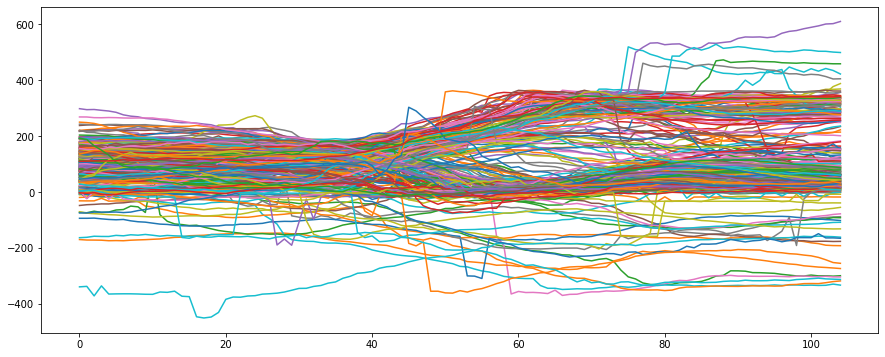

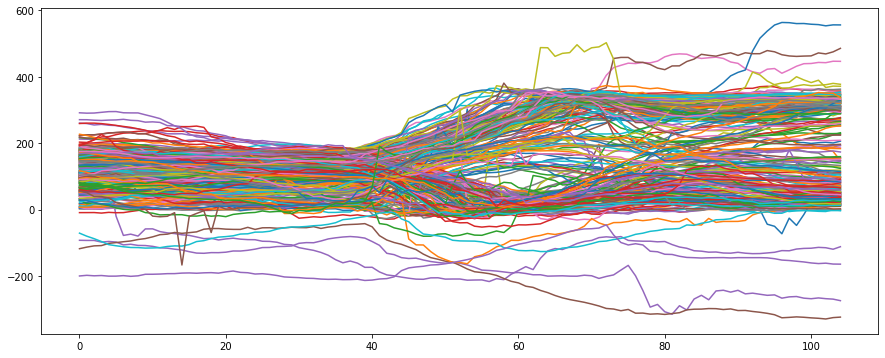

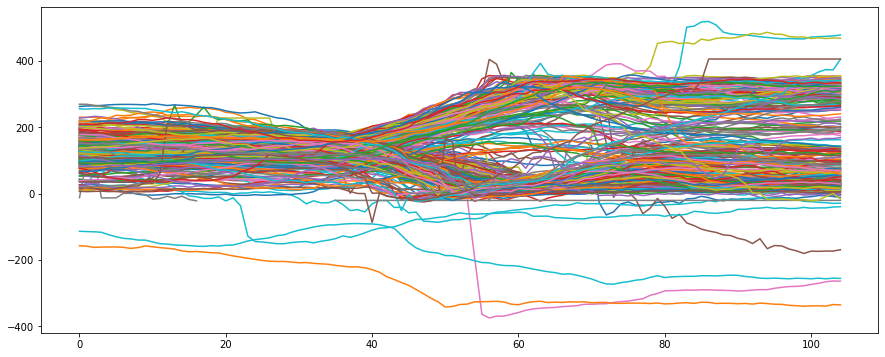

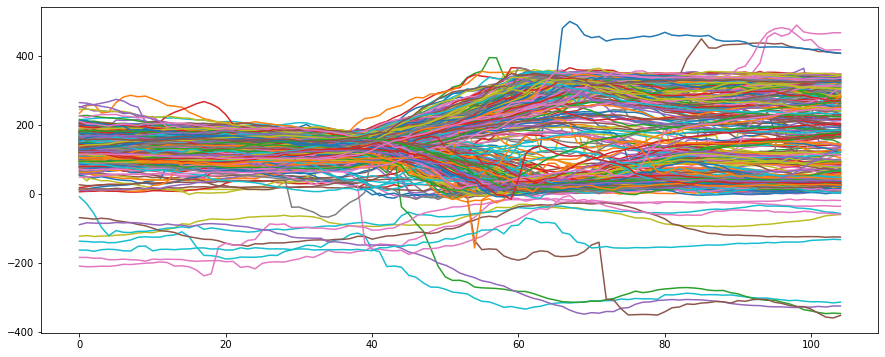

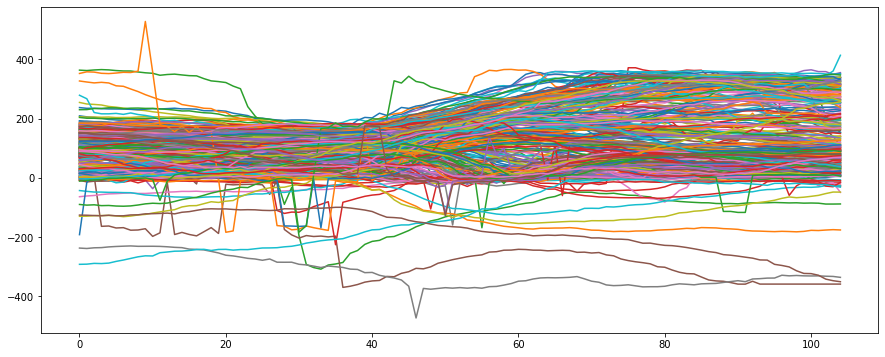

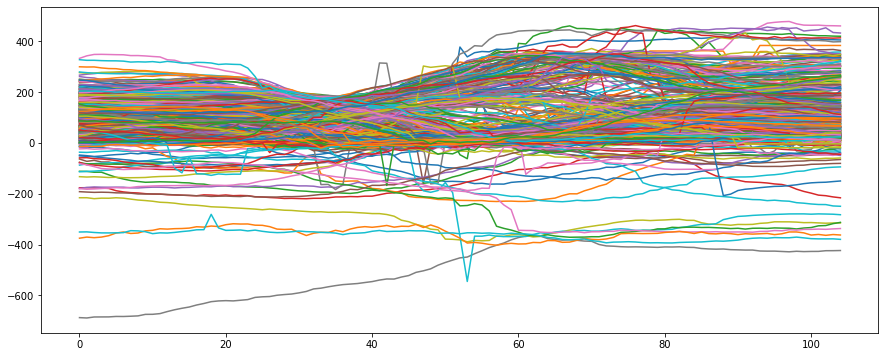

In [47]:
#Write script to pre-process and organize all pert trial into python dict for dict with seperate widths

search_key = ['4mm', '5mm', '8mm', '10mm', '10_deg', '30_deg']
dict_percswings_widths = defaultdict(dict)

for i in np.arange(len(search_key)):
    dict_ridge = dict_ridge_widths[search_key[i]]
    dict_ridge = assign_dict_value_ridge_pos(dict_ridge)
    dict_ridge = assign_dict_value_FlippedRidgeTraces(dict_ridge)
    dict_ridge = assign_dict_value_RidgePeak(dict_ridge)
    dict_ridge = assign_dict_value_TAClassifier(dict_ridge)
    dict_ridge = assign_dict_value_TrialClassifier(dict_ridge)
    dict_ridge = assign_dict_value_FlippedTATraces(dict_ridge)
    dict_ridge = assign_dict_value_TA_and_Ridge_chunkPSTH(dict_ridge)
    dict_percswings_widths[search_key[i]] = dict_ridge

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


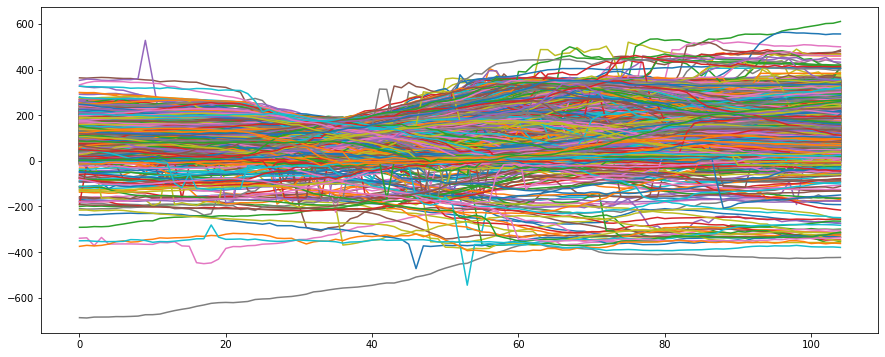

In [48]:
#Write script to pre-process and organize all pert trial into python dict

search_key = ['all']#, '5mm', '8mm', '10mm']
dict_percswings_all = defaultdict(dict)

for i in np.arange(len(search_key)):
    dict_ridge = dict_ridge_all[search_key[i]]
    dict_ridge = exclude_traces_after_QC(dict_ridge)
    dict_ridge = assign_dict_value_ridge_pos(dict_ridge)
    dict_ridge = assign_dict_value_FlippedRidgeTraces(dict_ridge)
    dict_ridge = assign_dict_value_RidgePeak(dict_ridge)
    dict_ridge = assign_dict_value_TAClassifier(dict_ridge)
    dict_ridge = assign_dict_value_TrialClassifier(dict_ridge)
    dict_ridge = assign_dict_value_FlippedTATraces(dict_ridge)
    dict_ridge = assign_dict_value_TA_and_Ridge_chunkPSTH(dict_ridge)
#    dict_ridge = alignSideandTopCamTraces(dict_ridge)
    dict_percswings_all[search_key[i]] = excludeNaNTATraces(dict_ridge)

  

In [49]:
def getTrajArray_from_dict(dict):
    data = list(dict.items())
    an_array = np.array(data)
    return an_array

In [50]:
def return_Mean_STD_forPSTH(array_value_dict):
    mean_array = np.nanmean(array_value_dict, axis = 0)
    STD_array = stats.sem(array_value_dict, nan_policy='omit')
    return mean_array, STD_array

In [51]:
def assign_quadrant_classifier(TA, no_quad = 6):
    lst = np.arange(361)
    chunks_list = np.array_split(lst, no_quad)
    classifier = []
    for i in np.arange(len(chunks_list)):
        first_value = chunks_list[i][0]
        last_value = chunks_list[i][-1]
        if first_value <= TA <= last_value:
            classifier = i
    return classifier

In [52]:
###############Figure 4C

In [53]:
# DECIDE HERE INTERVAL TO PLOT
int_beg = 0
int_end = 500

In [54]:
def excludeTATracesHighDerivative(dict_ridge):
    #Exclude from dict all trials where the TA traj derivative is high
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys()) #trial
    for i in np.arange(len(key_list)):
        TA_traj = smooth(values_list[i][-3][0])
        TA_diff = np.diff(TA_traj)
        #print(TA_diff)
        if np.any(TA_diff>100) or np.any(TA_diff<-100):
            key_to_be_deleted = key_list[i]
            dict_ridge.pop(key_to_be_deleted, None)

    return dict_ridge   

In [55]:
def excludeTATracesabove180(dict_ridge):
    #Exclude from dict all trials where the TA traj is higher than 180 before pert
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys()) #trial
    for i in np.arange(len(key_list)):
        TA_traj = values_list[i][-1][0]#[0:250]
        TA_traj_before_pert = TA_traj[0:100]
        #BodyAxis = values_list[i][-3][3]
        #plt.plot(TA_traj_before_pert)
        if np.any(TA_traj>600) or np.any(TA_traj<-70):# or np.any(BodyAxis>150) or np.any(BodyAxis<50):
            key_to_be_deleted = key_list[i]
            dict_ridge.pop(key_to_be_deleted, None)

    return dict_ridge   

In [56]:
def splitsequenceequally(seq, num):
    avg = len(seq) / float(num)
    out = []
    last = 0.0

    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg

    return out

In [57]:
def find_idx_trace_below_thresh(trace, thresh, ridge_peak):
    #Take trace leftward to the peak
    #trace_left = trace[0:100]
    new_idx = 0
    i = ridge_peak
    trace = np.diff(smooth(trace, 20))
    #print(trace, thresh, ridge_peak)
    while i > 0:
        if trace[i] < thresh:
            new_idx = i
            break
        else:
            i -= 1
    return new_idx-10

In [58]:
# def extract_RT(input_array, reference_index, threshold=0):
#     """
#     Subtract each element of the input array from the value at the reference index,
#     then extract the index where the resulting time series crosses a threshold.

#     Parameters:
#     - input_array (list or numpy array): The 1D array.
#     - reference_index (int): The index to subtract from.
#     - threshold (float): The threshold value for identifying the crossing.

#     Returns:
#     - crossing_index (int): The index where the time series crosses the threshold after the reference index.
#     """

#     # Subtract each element from the value at the reference index
#     subtracted_time_series = np.array(input_array[reference_index:]) - input_array[reference_index]

#     # Find the index where the subtracted time series crosses the threshold
#     crossing_index = next(i for i, value in enumerate(subtracted_time_series) if value > threshold)

#     # Adjust the index to be relative to the original array
#     crossing_index += reference_index

#     return crossing_index


In [59]:
def extract_RT(input_array, reference_index, threshold=0):
    """
    Subtract each element of the input array from the value at the reference index,
    then extract the index where the resulting time series crosses a threshold.

    Parameters:
    - input_array (list or numpy array): The 1D array.
    - reference_index (int): The index to subtract from.
    - threshold (float): The threshold value for identifying the crossing.

    Returns:
    - crossing_index (int): The index where the time series crosses the threshold after the reference index.
      Returns -1 if no crossing index is found.
    """

    # Subtract each element from the value at the reference index
    subtracted_time_series = np.array(input_array[reference_index:]) - input_array[reference_index]

    try:
        # Find the index where the subtracted time series crosses the threshold
        crossing_index = next(i for i, value in enumerate(subtracted_time_series) if value > threshold)

        # Adjust the index to be relative to the original array
        crossing_index += reference_index

    except StopIteration:
        # If no crossing index is found, return -1
        crossing_index = []#-1

    return crossing_index


In [60]:
def find_peak_vel(array):
    array_vel = smooth(np.diff(array), 10)
    # Find peaks and their indices
    idx_peak, _ = find_peaks(array_vel, distance=15)

    if len(idx_peak) == 0:
        return None, None  # No peaks found

    # Find the index of the highest peak
    highest_peak_idx = np.argmax(array_vel[idx_peak])

    # Get the value of the highest peak using its index
    highest_peak_value = array_vel[idx_peak[highest_peak_idx]]

    return highest_peak_value, idx_peak[highest_peak_idx]


In [61]:
def plot_and_append_AngMomTraces(dict_ridge_Xwidth, angmom_lowerinterv, angmom_higherinterv, color_list):
    fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
    TA_traj_list = []
    TA_peakvel_list = []
    idx_maxvel_list = []
    HA_traj_list = []
    
    clrs = sns.color_palette("viridis", n_colors=8)   
    values_filename_list = list(dict_ridge_Xwidth.values())
    key_filename_list = list(dict_ridge_Xwidth.keys())
    for i in np.arange(len(key_filename_list)):
            Trial_classvalue = values_filename_list[i][-4]
            RidgePert_classvalue = values_filename_list[i][-8]
            HA_traj = values_filename_list[i][-1][4]
            TA_traj = values_filename_list[i][-1][0]
            Ridge_traj = values_filename_list[i][-1][6]
            COMYVel_traj = np.diff(values_filename_list[i][-1][5])
#            print(key_filename_list[i], TA_traj)#(values_filename_list[i][-5], RidgePert_classvalue, Trial_classvalue))
            #UNCOMMENT 1st LINE FOR CONTRA TRIALS or 2nd LINE FOR IPSI TRIALS
            #if TA_traj[110]<250:
            #and all(TA_traj>-20)and all(TA_traj[150:200]<220):
            #IPSI
            #if Trial_classvalue ==-1 and len(TA_traj)==70 and all(TA_traj>-150):
            #CONTRA
            if Trial_classvalue ==1 and len(TA_traj)==array_lenght and all(TA_traj>-20):# and np.nanmean(TA_traj[0:20])>120: #change to 1 for contra and to -1 for ipsi trials
#                 smooth_HA = -(smooth(HA_traj, 10))+360 #ipsi
                smooth_HA = (smooth(HA_traj, 10))-180 #contra

                #Extract HA in right direction
                HA_traj = -HA_traj+360
                smooth_TA = smooth(TA_traj, 10)
#                 print(smooth_TA)
                #Extract RT tail
                RT_tail = extract_RT(smooth_TA, 5, 0) #input_array, reference_index, threshold=0
                print(RT_tail)
                #Plot
                TA_peakvel, idx_maxvel = find_peak_vel(smooth_TA[0:40])
                ax1.plot(smooth_TA)
                ax1.plot(RT_tail, smooth_TA[RT_tail], 'x')
#                 ax1.set_title(key_filename_list[i])
                #ax1.set_ylim(0, 360)

                TA_traj_list.append(smooth_TA)#-np.nanmean(TA_traj))
                TA_peakvel_list.append(TA_peakvel)
                idx_maxvel_list.append(idx_maxvel)
                HA_traj_list.append(smooth_HA)#-np.nanmean(TA_traj))

                        
    return TA_traj_list, TA_peakvel_list, idx_maxvel_list, HA_traj_list

In [62]:
def plot_PSTH_Mean_STD_label_color_pre_assigned(mean_array, std_array, ax, lineopacity, clrs, label_strings):
    with sns.axes_style("darkgrid"):
        for i in range(len(mean_array)):
            epochs = list(range(len(mean_array[i])))
            mean_array[i] = mean_array[i]#[int_beg:int_end]#-mean_array[i][100]
            x = np.linspace(0, len(mean_array[i]), len(mean_array[i]))#np.linspace(-50, (int_end-int_beg)/0.3, len(mean_array[i]))
            ax1.plot(x, mean_array[i], c=clrs, alpha=lineopacity)
            ax1.fill_between(x, mean_array[i]-std_array[i][int_beg:int_end], mean_array[i]+std_array[i][int_beg:int_end], \
                            alpha=0.2, facecolor=clrs, label = label_strings)
            #ax1.legend(loc="upper right", fontsize = 13, frameon=False)
            ax1.set_xlabel('Frame number (FR = 300 Hz)')
            ax1.set_ylabel('Angular Momentum (g-cm2/s)')


    return ax

In [63]:
def compute_AngMom_width(TA_traj_list):
    mean_TA, std_TA = return_Mean_STD_forPSTH(TA_traj_list)
    means = [mean_TA]
    stds = [std_TA]
    return means, stds

6
[]
6
6
80
7
6
6
6
[]
[]
[]
10
[]
[]
6
6
6
[]
11
6
[]
6
[]
6
6
[]


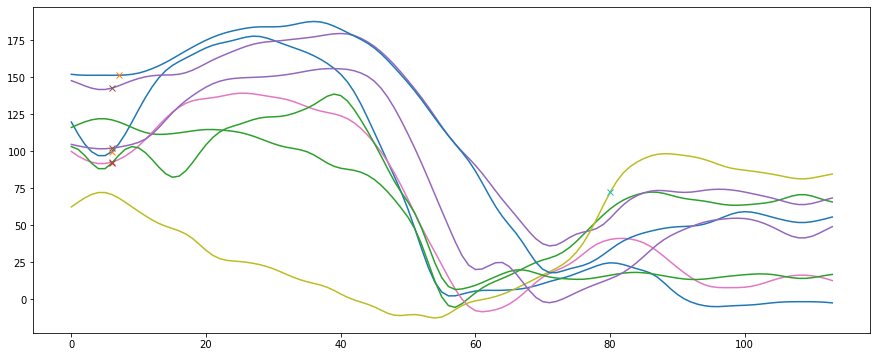

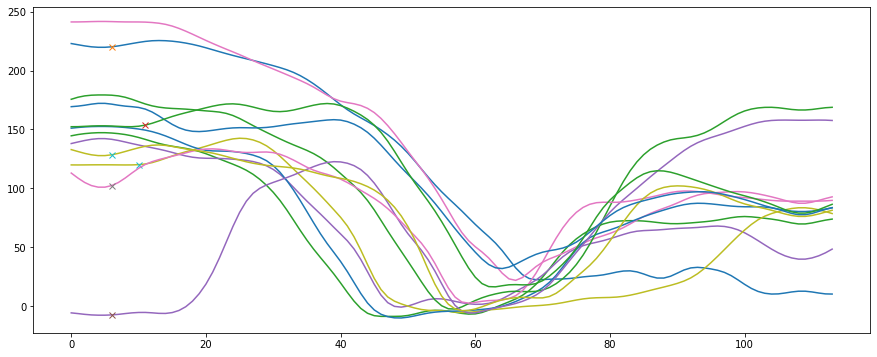

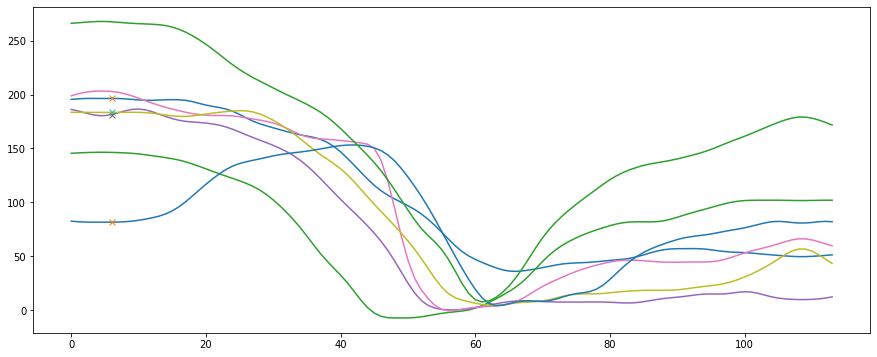

In [64]:
#Plot trials of same width together changing the dict_ridge_all key
Xwidth_keys = ['4mm']#,'4mm', '30_deg']#'5mm', '8mm', '10mm']#, '30_deg']
MouseID_key = ['M49', 'M54', 'M59']#'M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']
#['M48', 'M49', 'M51']#
angmom_lowerinterv = [100, 100, 100, 100, 105, 105, 105]
angmom_higherinterv = [150, 150, 150, 150, 150, 150]
color_list = ['y', 'r', 'b', 'g']
#fig, ax1 = plt.subplots(1, 1, figsize=(15,6))

list_std_AngMom = []
list_TAtraj_means = []
list_TAtraj_stds = []
list_HAtraj_means = []
list_HAtraj_stds = []
mean_TA_peakvel_list = []
mean_idxmaxvel_list = []

dict_TAmeansStds_byMouseID_Cond = defaultdict(dict)
dict_HAmeansStds_byMouseID_Cond = defaultdict(dict)
dict_peakvel_idx = defaultdict(dict)
for i in np.arange(len(Xwidth_keys)):
    list_TAtraj = []
    list_TAtraj_stds = []
    list_HAtraj = []
    list_HAtraj_stds = []
    dict_ridge_Xwidth = dict_percswings_widths[Xwidth_keys[i]]
    for m in np.arange(len(MouseID_key)):
#         fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
        dict_ridge_XwidthXmouseID = dict(filter(lambda item: MouseID_key[m] in item[0], dict_ridge_Xwidth.items())) 
        #print(list(dict_ridge_XwidthXmouseID.keys()))
        TA_traj_list, TA_peakvel, idx_maxvel, HA_traj_list = \
        plot_and_append_AngMomTraces(dict_ridge_XwidthXmouseID, angmom_lowerinterv[i], \
                                     angmom_higherinterv[i], color_list[i])
        #compute mean peakvel and idxpeakvel
#         print(TA_peakvel)
        mean_TA_peakvel_list.append(np.nanmean(TA_peakvel))
        mean_idxmaxvel_list.append(np.nanmean(idx_maxvel))
        dict_peakvel_idx = [mean_TA_peakvel_list, mean_idxmaxvel_list]
        #compute means+std
        means, stds = compute_AngMom_width(TA_traj_list)
        means_HA, stds_HA = compute_AngMom_width(HA_traj_list)

        list_TAtraj.append(means)
        list_TAtraj_stds.append(stds)
        list_HAtraj.append(means_HA)
        list_HAtraj_stds.append(stds_HA)
        dict_TAmeansStds_byMouseID_Cond[MouseID_key[m]][Xwidth_keys[i]] = [means, stds]
        dict_HAmeansStds_byMouseID_Cond[MouseID_key[m]][Xwidth_keys[i]] = [means_HA, stds_HA]

    



In [65]:
#returr neg values
def neg(lst):
    return [x for x in lst if x < 0] or None

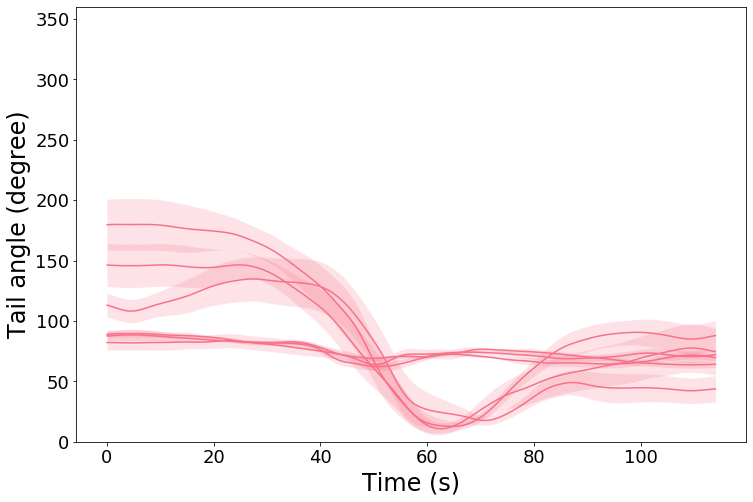

In [66]:
clrs = sns.color_palette("husl", 4)
label_strings = ['SAL', 'CNO']
lineopacity = [1, 1]#


fig, ax1 = plt.subplots(figsize=(12, 8))
for i in np.arange(len(MouseID_key)):
#     fig, ax1 = plt.subplots(figsize=(12, 8))
    for j in np.arange(len(Xwidth_keys)):
        plot_PSTH_Mean_STD_label_color_pre_assigned(dict_TAmeansStds_byMouseID_Cond[MouseID_key[i]][Xwidth_keys[j]][0], \
                                                    dict_TAmeansStds_byMouseID_Cond[MouseID_key[i]][Xwidth_keys[j]][1], \
                                                    ax1, lineopacity[j], clrs[j], label_strings[j])
        plot_PSTH_Mean_STD_label_color_pre_assigned(dict_HAmeansStds_byMouseID_Cond[MouseID_key[i]][Xwidth_keys[j]][0], \
                                                    dict_HAmeansStds_byMouseID_Cond[MouseID_key[i]][Xwidth_keys[j]][1], \
                                                    ax1, lineopacity[j], clrs[j], label_strings[j])
        plt.ylim(0, 360)
        #ax1.legend(loc="lower left", prop={'size': 12})
        ax1.set_xlabel('Time (s)', fontsize=24)
        ax1.set_ylabel('Tail angle (degree)', fontsize=24)
        ax1.tick_params(axis='both', which='major', labelsize=18) 
        fig.savefig('nopertTA_allMiceallWidth.svg', format='svg', dpi=1200)

In [67]:
#Compute max velocity and peak to max vel for fig 2a3 (July2023)

In [68]:
#  def find_peak_vel(array, peak_offset):
#     array_vel = array#smooth(np.diff(array), 5)
#     x = np.linspace(1, len(array_vel), len(array_vel))
    
#     #idx
#     idx_peak, _ = find_peaks(array_vel, distance = 15)
    
#     # Find the index from the maximum peak
#     i_max_peak = idx_peak[np.argmax(array_vel[idx_peak])]

# #     # Find the x value from that index
# #     x_max = np.array(x[i_max_peak])

#     return array_vel[i_max_peak], i_max_peak

In [69]:
# def find_peak_vel(array, peak_offset, threshold):
#     array_vel = array  # smooth(np.diff(array), 5)
#     x = np.linspace(1, len(array_vel), len(array_vel))

#     # Find peaks and their indices
#     idx_peak, _ = find_peaks(array_vel, distance=15)

#     if len(idx_peak) == 0:
#         # No peaks found, return None
#         return None, None

#     # Find the index from the maximum peak
#     i_max_peak = idx_peak[np.argmax(array_vel[idx_peak])]

#     # Check if the peak value is above the threshold
#     if array_vel[i_max_peak] < threshold:
#         # Peak value is below the threshold, return None
#         return None, None

#     # Uncomment the following lines if you also need the x value from the index
#     # Find the x value from that index
#     # x_max = np.array(x[i_max_peak])
#     return array_vel[i_max_peak], i_max_peak


In [70]:
import numpy as np
from scipy.signal import find_peaks

def find_peak_vel(array, peak_offset, threshold_low, threshold_high):
    array_vel = array  # smooth(np.diff(array), 5)
    x = np.linspace(1, len(array_vel), len(array_vel))

    # Find peaks and their indices
    idx_peak, _ = find_peaks(array_vel, distance=15)

    if len(idx_peak) == 0:
        # No peaks found, return None
        return None, None

    # Find the index from the maximum peak
    i_max_peak = idx_peak[np.argmax(array_vel[idx_peak])]

    # Check if the peak value is within the specified thresholds
    peak_value = array_vel[i_max_peak]
    if peak_value < threshold_low or peak_value > threshold_high:
        # Peak value is outside the specified thresholds, return None
        return None, None

    # Uncomment the following lines if you also need the x value from the index
    # Find the x value from that index
    # x_max = np.array(x[i_max_peak])

    return peak_value, i_max_peak


In [71]:
def plot_and_append_AngMomTraces(dict_ridge_Xwidth, angmom_lowerinterv, angmom_higherinterv, color_list):
#     fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
    TA_traj_list = []
    TA_peakvel_list = []
    idx_maxvel_list = []

    clrs = sns.color_palette("viridis", n_colors=8)   
    values_filename_list = list(dict_ridge_Xwidth.values())
    key_filename_list = list(dict_ridge_Xwidth.keys())
    for i in np.arange(len(key_filename_list)):
            Trial_classvalue = values_filename_list[i][-4]
            RidgePert_classvalue = values_filename_list[i][-8]
            HA_traj = values_filename_list[i][-1][4]
            TA_traj = values_filename_list[i][-1][0]
            Ridge_traj = values_filename_list[i][-1][6]
            COMYVel_traj = np.diff(values_filename_list[i][-1][5])
            #Use Trial_classvalue ==-1 for ipsi and Trial_classvalue ==1  for contra
#             if Trial_classvalue ==1 and len(TA_traj)==array_lenght and np.nanmean(TA_traj[0:20])>160: #change to 1 for contra and to -1 for ipsi trials, range [20:60]
            if Trial_classvalue ==-1 and len(TA_traj)==array_lenght and np.nanmean(TA_traj[0:20])>160: #change to 1 for contra and to -1 for ipsi trials [20:50]

                #Use this for Hips peak vel (keep minus sign for hips, for both ipsi and contra trials)
                TA_vel_traj = np.diff(smooth(-HA_traj, 10))

#                 #Use this for TA peak vel (use plus sign for ipsi trial, and minus sign for contra trials)
#                 TA_vel_traj = np.diff(smooth(TA_traj, 10))

                peak_offset = 20+10 #20 for tail, 20+10 for hips
                threshold_peak_low = 2.5
                threshold_peak_high = 10
                TA_peakvel, idx_maxvel = find_peak_vel(TA_vel_traj[peak_offset:45], peak_offset, threshold_peak_low, \
                                                      threshold_peak_high)
                if idx_maxvel:
                    ax1.plot(TA_vel_traj)
                    ax1.plot(idx_maxvel+peak_offset, TA_vel_traj[idx_maxvel+peak_offset], 'x')
                    ax1.set_ylim(-15, 15)
                    
                    TA_traj_list.append(TA_vel_traj)#-np.nanmean(TA_traj))
                    TA_peakvel_list.append(TA_peakvel)
                    idx_maxvel_list.append(idx_maxvel)

                        
    return TA_traj_list, TA_peakvel_list, idx_maxvel_list

In [72]:
def plot_PSTH_Mean_STD_label_color_pre_assigned(mean_array, std_array, ax, lineopacity, clrs, label_strings):
    with sns.axes_style("darkgrid"):
        for i in range(len(mean_array)):
            epochs = list(range(len(mean_array[i])))
            mean_array[i] = mean_array[i][int_beg:int_end]#-mean_array[i][100]
            x = np.linspace(-50, (int_end-int_beg)/0.3, len(mean_array[i]))
            ax1.plot(x, mean_array[i], c=clrs, alpha=lineopacity)
            ax1.fill_between(x, mean_array[i]-std_array[i][int_beg:int_end], mean_array[i]+std_array[i][int_beg:int_end], \
                            alpha=0.2, facecolor=clrs, label = label_strings)
            #ax1.legend(loc="upper right", fontsize = 13, frameon=False)
            ax1.set_xlabel('Frame number (FR = 300 Hz)')
            ax1.set_ylabel('Angular Momentum (g-cm2/s)')
#             ax.axvline(57/0.3,0,360, color = 'red')
#             ax.axvline(73/0.3,0,360, color = 'red')
#             ax.axvline(85/0.3,0,360, color = 'red')

    return ax

In [73]:
def compute_AngMom_width(TA_traj_list):
    mean_TA, std_TA = return_Mean_STD_forPSTH(TA_traj_list)
    means = [mean_TA]
    stds = [std_TA]
    return means, stds

In [74]:
def flatten_list_of_arrays(arrays_list):
    return [item for array in arrays_list for item in array]


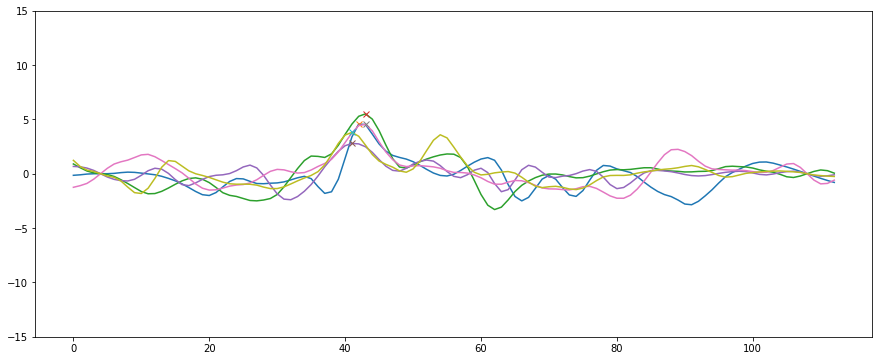

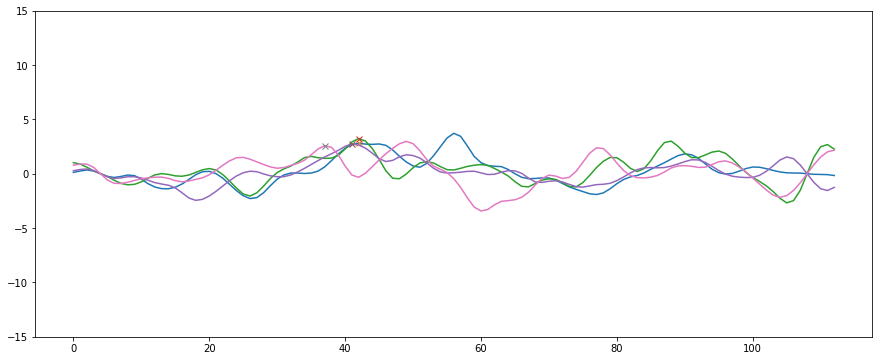

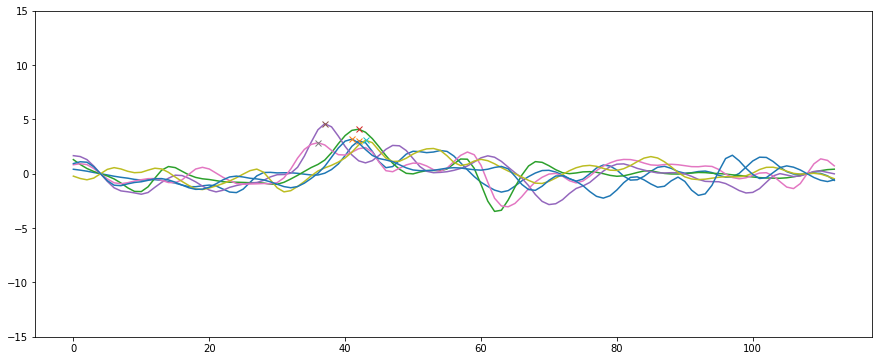

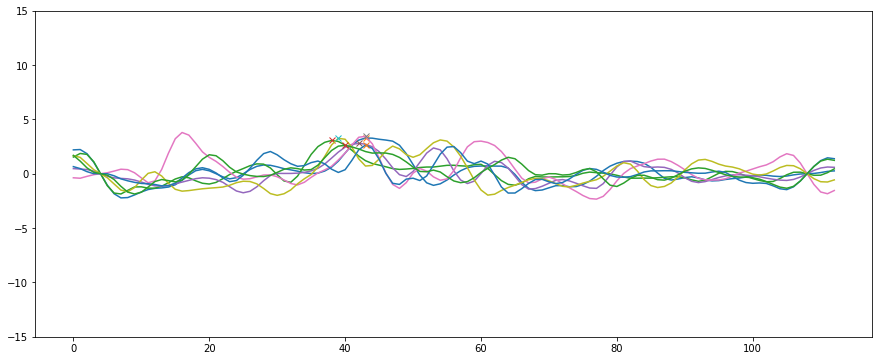

In [75]:
#Plot trials of same width together changing the dict_ridge_all key. Output is dict_TAmeansStds_byMouseID_Cond with all time to peak and peak velocity for all widths trials
Xwidth_keys = ['4mm', '5mm', '8mm', '10mm']#,'4mm', '30_deg']#'5mm', '8mm', '10mm']#, '30_deg']
MouseID_key = ['M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']
#['M48', 'M49', 'M51']
angmom_lowerinterv = [100, 100, 100, 100, 105, 105, 105]
angmom_higherinterv = [150, 150, 150, 150, 150, 150]
color_list = ['y', 'r', 'b', 'g']
#fig, ax1 = plt.subplots(1, 1, figsize=(15,6))

list_std_AngMom = []
list_TAtraj_means = []
list_TAtraj_stds = []
mean_TA_peakvel_list = []
mean_idxmaxvel_list = []

dict_TAmeansStds_byMouseID_Cond = defaultdict(dict)
dict_peakvel_idx = defaultdict(dict)


for i in np.arange(len(Xwidth_keys)):
#     mean_TA_peakvel_list = []
#     mean_idxmaxvel_list = []
    fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
    dict_ridge_Xwidth = dict_percswings_widths[Xwidth_keys[i]]
    for m in np.arange(len(MouseID_key)):
        dict_ridge_XwidthXmouseID = dict(filter(lambda item: MouseID_key[m] in item[0], dict_ridge_Xwidth.items())) 
        #print(list(dict_ridge_XwidthXmouseID.keys()))
        TA_traj_list, TA_peakvel, idx_maxvel = \
        plot_and_append_AngMomTraces(dict_ridge_XwidthXmouseID, angmom_lowerinterv[i], \
                                     angmom_higherinterv[i], color_list[i])
        #compute mean peakvel and idxpeakvel
        mean_TA_peakvel_list.append(TA_peakvel)
        mean_idxmaxvel_list.append(idx_maxvel)
#         dict_peakvel_idx = [mean_TA_peakvel_list, mean_idxmaxvel_list]
#         #compute means+std
#         means, stds = compute_AngMom_width(TA_traj_list)
#         list_TAtraj.append(means)
#         list_TAtraj_stds.append(stds)
dict_TAmeansStds_byMouseID_Cond[Xwidth_keys[i]] = [flatten_list_of_arrays(mean_TA_peakvel_list), \
                                                       flatten_list_of_arrays(mean_idxmaxvel_list)]

    



In [76]:
dict_TAmeansStds_byMouseID_Cond

defaultdict(dict,
            {'10mm': [[4.570967042741302,
               5.5057044063797775,
               2.787257185248734,
               4.548242022615909,
               3.801306611528048,
               2.796641036155961,
               3.234290303944988,
               2.724725318125877,
               2.575446864343519,
               3.030301498707786,
               4.092110027882427,
               4.599738054813201,
               2.854271049140209,
               3.0769894425679354,
               3.18089829312936,
               3.2860877777554833,
               3.0576909165446864,
               2.7917215784101472,
               3.441204276973167,
               3.251942306509875,
               2.6320479045936622,
               2.6070279966015732],
              [12,
               13,
               11,
               13,
               11,
               12,
               12,
               11,
               7,
               12,
               12,
           

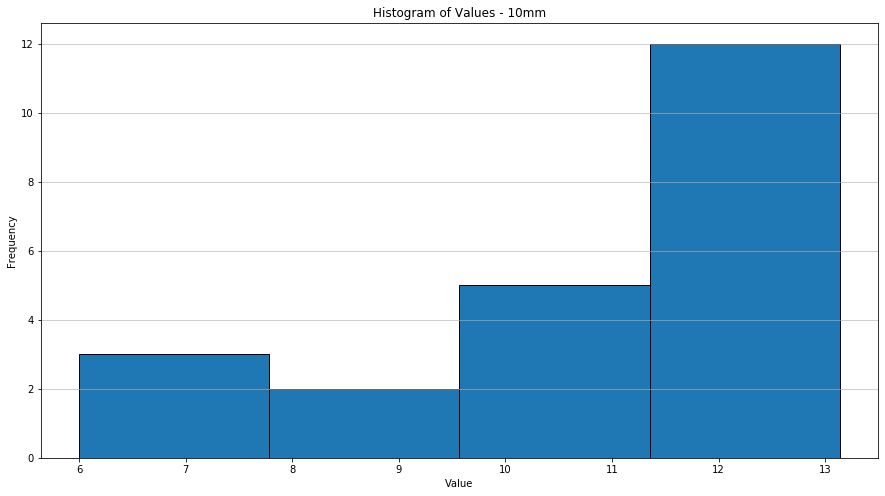

In [77]:
import matplotlib.pyplot as plt
import numpy as np

def plot_histogram(data, bin_size_method='auto'):
    num_sublists = len(data)
    fig, axs = plt.subplots(1, num_sublists, figsize=(15, 8 * num_sublists))
    axs = axs if num_sublists > 1 else [axs]  # Ensure axs is always iterable

    for (label, sublist), ax in zip(data.items(), axs):
        values = sublist[1]  # Extract the values from the sublist (change to 0 for peak vel and 1 for time to peak)

        if bin_size_method == 'auto':
            # Automatically calculate the bin size using Freedman-Diaconis rule
            bin_size = 2 * (np.percentile(values, 75) - np.percentile(values, 25)) / (len(values) ** (1/3))
        elif bin_size_method == 'sturges':
            # Use Sturges' formula to determine the number of bins
            num_bins = int(np.ceil(np.log2(len(values) + 1)))
            bin_size = (max(values) - min(values)) / num_bins
        else:
            # Default to 'auto' if an unsupported method is specified
            bin_size = 1.0

        # Create a separate subplot for each sublist
        ax.hist(values, bins=np.arange(min(values), max(values) + bin_size, bin_size), edgecolor='k')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
        ax.set_title(f'Histogram of Values - {label}')
        ax.grid(axis='y', alpha=0.75)

    plt.show()


plot_histogram(dict_TAmeansStds_byMouseID_Cond, bin_size_method='auto')


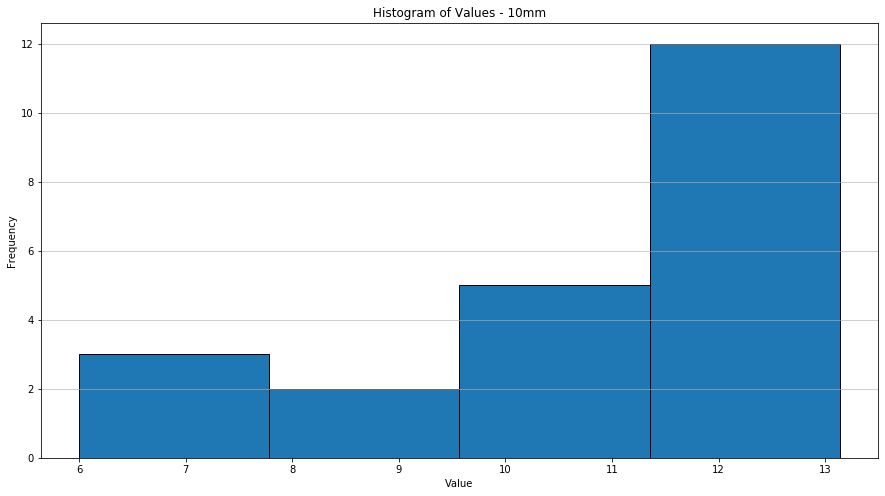

In [78]:
plot_histogram(dict_TAmeansStds_byMouseID_Cond, bin_size_method='auto')

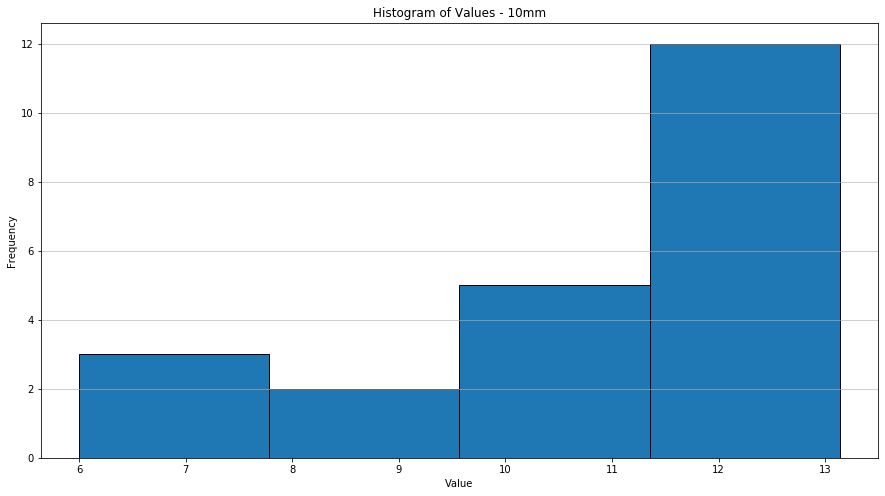

In [79]:
plot_histogram(dict_TAmeansStds_byMouseID_Cond, bin_size_method='auto')

In [80]:
#####  Compute acceleration comparing diff withs early phase

In [81]:
def plot_and_append_AngMomTraces(dict_ridge_Xwidth, angmom_lowerinterv, angmom_higherinterv, color_list):
#     fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
    TA_traj_list = []
    TA_peakacc_list = []
    idx_maxvel_list = []

    clrs = sns.color_palette("viridis", n_colors=8)   
    values_filename_list = list(dict_ridge_Xwidth.values())
    key_filename_list = list(dict_ridge_Xwidth.keys())
    for i in np.arange(len(key_filename_list)):
            Trial_classvalue = values_filename_list[i][-4]
            RidgePert_classvalue = values_filename_list[i][-8]
            HA_traj = values_filename_list[i][-1][4]
            TA_traj = values_filename_list[i][-1][0]
            Ridge_traj = values_filename_list[i][-1][6]
            COMYVel_traj = np.diff(values_filename_list[i][-1][5])
            #Use Trial_classvalue ==-1 for ipsi and Trial_classvalue ==1  for contra
#             if Trial_classvalue ==1 and len(TA_traj)==array_lenght and np.nanmean(TA_traj[0:20])>160: #change to 1 for contra and to -1 for ipsi trials, range [20:60]
            if Trial_classvalue ==-1 and len(TA_traj)==array_lenght:# and np.nanmean(TA_traj[0:20])>0: #change to 1 for contra and to -1 for ipsi trials [20:50]

                
                
#                 #Use this for Hips peak vel (keep minus sign for hips, for both ipsi and contra trials)
#                 TA_vel_traj = np.diff(smooth(-HA_traj, 10))

                #Use this for TA peak vel (use plus sign for ipsi trial, and minus sign for contra trials)
                TA_vel_traj = np.diff(smooth(TA_traj, 10))

                peak_offset = 20 #20 for tail, 20+10 for hips
                threshold_peak_low = 2.5
                threshold_peak_high = 10
                TA_peakvel, idx_maxvel = find_peak_vel(TA_vel_traj[peak_offset:35], peak_offset, threshold_peak_low, \
                                                      threshold_peak_high)

                if idx_maxvel:
                    #Compute acceleration
                    TA_acc = TA_peakvel/idx_maxvel
                    
                    ax1.plot(TA_vel_traj)
                    ax1.plot(idx_maxvel+peak_offset, TA_vel_traj[idx_maxvel+peak_offset], 'x')
                    ax1.set_ylim(-15, 15)
                    
                    TA_traj_list.append(TA_vel_traj)#-np.nanmean(TA_traj))
                    TA_peakacc_list.append(TA_acc)#TA_peakvel)
                    idx_maxvel_list.append(idx_maxvel)

                        
    return TA_traj_list, TA_peakacc_list, idx_maxvel_list

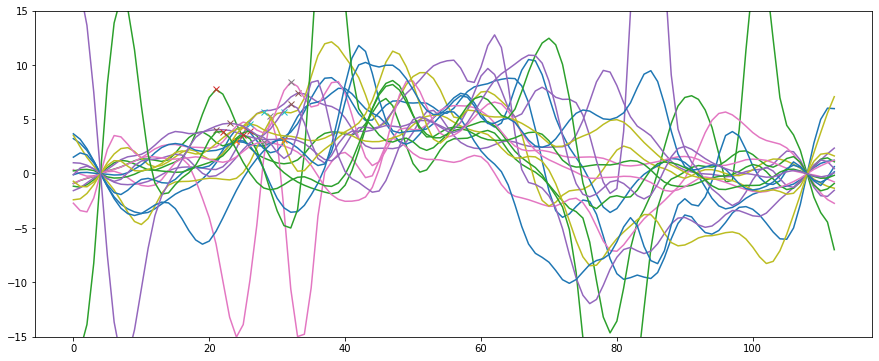

In [82]:
#Plot trials of same width together changing the dict_ridge_all key. Output is dict_TAmeansStds_byMouseID_Cond with all time to peak and peak velocity for all widths trials
Xwidth_keys = ['4mm']#, '5mm', '8mm', '10mm']#,'4mm', '30_deg']#'5mm', '8mm', '10mm']#, '30_deg']
MouseID_key = ['M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']
#['M48', 'M49', 'M51']
angmom_lowerinterv = [100, 100, 100, 100, 105, 105, 105]
angmom_higherinterv = [150, 150, 150, 150, 150, 150]
color_list = ['y', 'r', 'b', 'g']
#fig, ax1 = plt.subplots(1, 1, figsize=(15,6))

list_std_AngMom = []
list_TAtraj_means = []
list_TAtraj_stds = []
mean_TA_peakacc_list = []
mean_idxmaxvel_list = []

dict_TAmeansStds_byMouseID_Cond = defaultdict(dict)
dict_peakvel_idx = defaultdict(dict)


for i in np.arange(len(Xwidth_keys)):
#     mean_TA_peakvel_list = []
#     mean_idxmaxvel_list = []
    fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
    dict_ridge_Xwidth = dict_percswings_widths[Xwidth_keys[i]]
    for m in np.arange(len(MouseID_key)):
        dict_ridge_XwidthXmouseID = dict(filter(lambda item: MouseID_key[m] in item[0], dict_ridge_Xwidth.items())) 
        #print(list(dict_ridge_XwidthXmouseID.keys()))
        TA_traj_list, TA_peakacc, idx_maxvel = \
        plot_and_append_AngMomTraces(dict_ridge_XwidthXmouseID, angmom_lowerinterv[i], \
                                     angmom_higherinterv[i], color_list[i])
        #compute mean peakvel and idxpeakvel
        mean_TA_peakacc_list.append(TA_peakacc)
#         mean_idxmaxvel_list.append(idx_maxvel)
        
#         dict_peakvel_idx = [mean_TA_peakvel_list, mean_idxmaxvel_list]
#         #compute means+std
#         means, stds = compute_AngMom_width(TA_traj_list)
#         list_TAtraj.append(means)
#         list_TAtraj_stds.append(stds)
dict_TAmeansStds_byMouseID_Cond[Xwidth_keys[i]] = [flatten_list_of_arrays(mean_TA_peakacc_list)]

    



In [83]:
dict_TAmeansStds_byMouseID_Cond

defaultdict(dict,
            {'4mm': [[0.742328677799108,
               7.750483485887067,
               0.570434203297448,
               0.5868943713015405,
               0.5151592918195989,
               0.8573342205641922,
               0.6561818742022515,
               4.053750998429479,
               0.702338734482197,
               0.7669656770057666,
               0.7582740105017418,
               0.7120022491563901,
               0.5318085551891691,
               0.3644630563504663,
               0.710171940279066,
               0.2824316965489192,
               1.9372657290986552,
               1.5472061449194665]]})

In [84]:
# _, ax = plt.subplots(figsize=(12, 8))
# clrs = sns.color_palette("husl", 8)
# #fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
# lineopacity = [0.1, 0.5, 1, 1]

# legend_id = ['pert 10 deg', 'pert 20 deg', 'pert 30 deg']
# for i in np.arange(len(list_means_AngMom)):
#     plot_PSTH_Mean_STD_label_color_pre_assigned(list_means_AngMom[i], list_std_AngMom[i], ax, lineopacity[i], legend_id[i])
#     print(np.trapz(abs(list_means_AngMom[i][1])))
#     ax.set_xlabel('Time (ms)', fontsize=18)
#     ax.set_ylabel('Angular Momentum (g-cm2/s)', fontsize=18)
#     ax.tick_params(axis='both', which='major', labelsize=14) 
# plt.savefig('out_bla.svg', format='svg', dpi=1200)


In [85]:
# #Save values into dict

# data = dict_TA_AngMom_conditions
# import pandas as pd

# (pd.DataFrame.from_dict(data=data, orient='index')
#    .to_csv('dict_file_TA_tc.csv', header=False))

In [86]:
####################Plot COMY velocity during perturbation for 10-20-30 deg tilts

In [87]:
# DECIDE HERE INTERVAL TO PLOT
int_beg = [75, 75, 75]
int_end = [220, 220, 220] #13 is delay interval between end of 10 vs 20 deg, and 9 is delay btw 10vs30 deg tilt

In [88]:
def find_min_pos_value(l):
    min_pos = min([i for i in l if i > 0])
    return min_pos

In [89]:
def countNo_valuesBelowThresh(l, t):
    n = np.count_nonzero(l < t)
    return n

In [90]:
def plot_and_append_COMYVel(dict_ridge_Xwidth, angmom_lowerinterv, angmom_higherinterv, color_list):
    search_key = ['M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']
    #fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
    HA_traj_list = []
    TA_traj_list = []
    HA_traj_list_AngMom = []
    TA_traj_list_AngMom = []
    Ridge_traj_list = []
    TA_cum_angmom_list = []
    COMYVel_traj_list = []
    v_ratio_list = []
    clrs = sns.color_palette("viridis", n_colors=8)   

    for i in np.arange(len(search_key)):
        res = dict(filter(lambda item: search_key[i] in item[0], dict_ridge_Xwidth.items())) 
    #     res = excludeTATracesHighDerivative(res)
    #    res = excludeTATracesabove180(res)
        values_filename_list = list(res.values())
        key_filename_list = list(res.keys())
        for i in np.arange(len(key_filename_list)):
                Trial_classvalue = values_filename_list[i][-4]
                if Trial_classvalue ==1: #change to 1 for ips and to -1 for contra trials
                    RidgePert_classvalue = values_filename_list[i][-10]
                    HA_traj = smooth_acausal(values_filename_list[i][-1][4])
                    TA_traj = smooth_acausal(values_filename_list[i][-1][0])
                    Ridge_traj = smooth_acausal(values_filename_list[i][-1][6])#/5
                    COMYVel_traj = smooth_acausal((values_filename_list[i][-1][5]))
                    #UNCOMMENT 1st LINE FOR CONTRA TRIALS or 2nd LINE FOR IPSI TRIALS
                    if len(TA_traj) == 250 and len(HA_traj) == 250 and all(TA_traj<410) \
                    and all(TA_traj[150:200]>180) and TA_traj[110]<250:
                        x = np.linspace(0, 250/300, 250)
                        COMYVel_traj = smooth(np.diff(COMYVel_traj), 10)
                        plt.plot(COMYVel_traj,color = clrs[0], lw=1, alpha = 0.1)
                        COMYVel_traj_list.append(COMYVel_traj)
                        #calculate mean of initial velocity and append to list
                        v_0 = np.nanmean(COMYVel_traj[0:50])
                        #calculate lowest speed
                        lowest_speed = find_min_pos_value(COMYVel_traj)
                        #calculate time spent at <0.01 m/s speed (freezing at BMC biol 2020)
                        No_values_below_speed = (countNo_valuesBelowThresh(COMYVel_traj, 0.041))* 0.003#0.01/0.24(conversion pixel factor)
                        Time_spent_below_thresh = No_values_below_speed* 0.003
                        print(No_values_below_speed)
                        #calculate ratio and append to list
                        v_ratio = lowest_speed/v_0
                        v_ratio_list.append(v_ratio)

    return COMYVel_traj_list, v_ratio_list                    

In [91]:
def compute_AngMom_width(TA_traj_list):#, Ridge_traj_list):#HA_traj_list, Ridge_traj_list):
    mean_TA, std_TA = return_Mean_STD_forPSTH(TA_traj_list)

    mean_TA = (mean_TA)

    means = [mean_TA]
    stds = [std_TA]
    return means, stds

[]


C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: The length of the input vector x must be greater than padlen, which is 15.

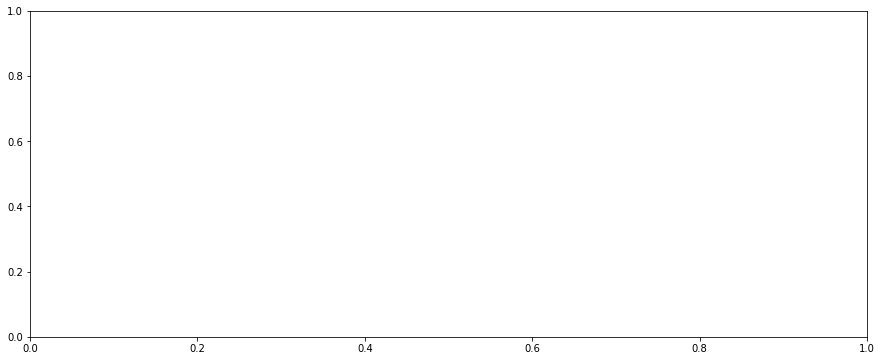

In [92]:
#Plot trials of same width together changing the dict_ridge_all key
Xwidth_keys = ['10_deg','4mm', '30_deg']#'5mm', '8mm', '10mm']#, '30_deg']
angmom_lowerinterv = [100, 100, 100, 100, 105, 105, 105]
angmom_higherinterv = [150, 150, 150, 150, 150, 150]
color_list = ['y', 'r', 'b', 'g']
fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
list_means_AngMom = []
list_std_AngMom = []
list_TA_AngMom_conditions = []
list_HA_AngMom_conditions = []
dict_TA_AngMom_conditions = defaultdict(dict)


for i in np.arange(len(Xwidth_keys)):
    COMvel_list, v_ratio = \
    plot_and_append_COMYVel(dict_percswings_widths[Xwidth_keys[i]], angmom_lowerinterv[i], \
                                 angmom_higherinterv[i], color_list[i])
    #take ratio of initial velocoty by final velocity
    #speed_dec_norm = v_0/low_speed#/v_0
    print(v_ratio)#, low_speed)
    #compute means+stds
    means, stds = compute_AngMom_width(COMvel_list)#, Ridge_traj_list)#HA_traj_list, Ridge_traj_list)
    list_means_AngMom.append(means)
    list_std_AngMom.append(stds)

    
clrs = sns.color_palette("viridis", n_colors=8)   
mean_pert_traces = np.nanmean(TA_traj_list, axis = 0)
plt.xlabel('Frame number (FR = 300 Hz)')
plt.ylabel('Tail Angle (degrees))')
plt.ylim(-6,4)
# plt.xlim(100,170)

In [ ]:
len(means)

In [ ]:
def plot_PSTH_Mean_STD_label_color_pre_assigned(mean_array, std_array, ax, lineopacity, legend_id, b1, b2):
    #clrs = sns.color_palette("husl", len(mean_array))
    label_strings = ['Tail', 'Ridge', 'Hip', 'Ridge']#, 'Ipsi 4mm', 'Contra 4mm', 'Ipsi 4mm', 'Contra 4mm']
#    _, ax = plt.subplots(figsize=(12, 8))
    clr_id = [0,2]
    with sns.axes_style("darkgrid"):
        #boundaries of tilt delay for different durations b1, and b2
        for i in range(len(mean_array)):
            epochs = list(range(len(mean_array[i])))
            mean_array[i] = mean_array[i][b1:b2]#-mean_array[i][100]
            x = np.linspace(-50, (b2-b1)/0.3, len(mean_array[i]))
            ax.plot(x, mean_array[i], c=clrs[clr_id[i]], label = legend_id[i], alpha=lineopacity)
            ax.fill_between(x, mean_array[i]-std_array[i][b1:b2], mean_array[i]+std_array[i][b1:b2], \
                            alpha=lineopacity, facecolor=clrs[clr_id[i]])
            ax.set_xlabel('Frame number (FR = 300 Hz)')
            ax.set_ylabel('Angular Momentum (g-cm2/s)')
#             ax.axvline(50,0,360, color = 'red')
#             ax.axvline(65,0,360, color = 'red')
#             ax.axvline(75,0,360, color = 'red')

    return ax

In [ ]:
int_beg

In [ ]:
_, ax = plt.subplots(figsize=(12, 8))
clrs = 'k'
#fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
lineopacity = [0.1, 0.3, 0.7, 1]

legend_id = ['pert 10 deg', 'pert 20 deg', 'pert 30 deg']
for i in np.arange(len(list_means_AngMom)):
    plot_PSTH_Mean_STD_label_color_pre_assigned(list_means_AngMom[i], list_std_AngMom[i], ax, lineopacity[i], legend_id[i], \
                                                int_beg[i], int_end[i])
    ax.set_xlabel('Time (ms)', fontsize=18)
    ax.set_ylabel('Angular Momentum (g-cm2/s)', fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=14) 
plt.savefig('out_bla.svg', format='svg', dpi=1200)


In [ ]:
####################Plot data figure 5

In [ ]:
# DECIDE HERE INTERVAL TO PLOT
int_beg = 90
int_end = 180

In [ ]:
def compute_AngMom_width(TA_traj_list, HA_traj_list):#HA_traj_list, Ridge_traj_list):
    mean_TA, std_TA = return_Mean_STD_forPSTH(TA_traj_list)
    mean_HA, std_HA = return_Mean_STD_forPSTH(HA_traj_list)
    #mean_Ridge, std_Ridge = return_Mean_STD_forPSTH(Ridge_traj_list)

    mean_TA = (mean_TA*8.15)
    mean_HA=mean_HA*40
    #mean_Ridge = mean_Ridge*25*5.5

    means = [mean_TA, mean_HA]#mean_HA, mean_Ridge]
    stds = [std_TA*8.15, std_HA*40]#std_HA*40, std_Ridge*25*5.5]
    return means, stds

In [ ]:
def plot_PSTH_Mean_STD_label_color_pre_assigned(mean_array, std_array, ax, lineopacity, legend_id):
    clrs = sns.color_palette("husl", len(mean_array))
    label_strings = ['Tail', 'Ridge', 'Hip', 'Ridge']#, 'Ipsi 4mm', 'Contra 4mm', 'Ipsi 4mm', 'Contra 4mm']
#    _, ax = plt.subplots(figsize=(12, 8))

    with sns.axes_style("darkgrid"):
        for i in range(len(mean_array)):
            epochs = list(range(len(mean_array[i])))
            mean_array[i] = mean_array[i][int_beg:int_end]#-mean_array[i][100]
            x = np.linspace(-50, (len(mean_array[i]))/0.3, len(mean_array[i]))
            ax.plot(x, mean_array[i], c=clrs[i], label = legend_id[i], alpha=lineopacity)
            ax.fill_between(x, mean_array[i]-std_array[i][int_beg:int_end], mean_array[i]+std_array[i][int_beg:int_end], \
                            alpha=0.2, facecolor=clrs[i])
            ax.legend(loc="upper right", fontsize = 13, frameon=False)
            ax.set_xlabel('Frame number (FR = 300 Hz)')
            ax.set_ylabel('Angular Momentum (g-cm2/s)')
            #ax.axvline(100/300,0,360, color = 'red')
            #ax.axvline(160,0,360, color = 'red')
            #ax.axvline(140,0,360, color = 'red')

    return ax

In [ ]:
#Plot trials of same width together changing the dict_ridge_all key
Xwidth_keys = ['4mm', '5mm', '8mm', '10mm']#, '30_deg']
angmom_lowerinterv = [100, 100, 100, 100, 105, 105, 105]
angmom_higherinterv = [150, 150, 150, 150, 150, 150]
color_list = ['y', 'r', 'b', 'g']
fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
list_means_AngMom = []
list_std_AngMom = []
list_TA_AngMom_conditions = []
list_HA_AngMom_conditions = []
dict_TA_AngMom_conditions = defaultdict(dict)
#dict_HA_AngMom_conditions = defaultdict(dict)


for i in np.arange(len(Xwidth_keys)):
    TA_traj_list, HA_traj_list, Ridge_traj_list, TA_traj_list_AngMom,  HA_traj_list_AngMom, pert_beg_idx_list = \
    plot_and_append_AngMomTraces(dict_percswings_widths[Xwidth_keys[i]], angmom_lowerinterv[i], \
                                 angmom_higherinterv[i], color_list[i])
    means, stds = compute_AngMom_width(TA_traj_list, HA_traj_list)#HA_traj_list, Ridge_traj_list)
    list_means_AngMom.append(means)
    list_std_AngMom.append(stds)
    list_TA_AngMom_conditions.append(TA_traj_list_AngMom)
    list_HA_AngMom_conditions.append(HA_traj_list_AngMom)
    dict_TA_AngMom_conditions[i] = [TA_traj_list_AngMom, HA_traj_list_AngMom]

clrs = sns.color_palette("viridis", n_colors=8)   
mean_pert_traces = np.nanmean(TA_traj_list, axis = 0)
x = np.linspace(0, 250/300, 249)
#plt.plot(x, mean_pert_traces, color = clrs[0], linewidth = 4)
plt.savefig('out.svg', format='svg', dpi=1200)
plt.xlabel('Frame number (FR = 300 Hz)')
plt.ylabel('Tail Angle (degrees))')

In [ ]:
legend_id = [['4mm TA', '4mm HA'], ['5mm TA', '5mm HA'], ['8mm TA', '8mm HA'], ['10mm TA', '10mm HA']]


_, ax = plt.subplots(figsize=(12, 8))
clrs = sns.color_palette("husl", 8)
#fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
lineopacity = [0.1, 0.4, 0.8, 1]

for i in np.arange(len(list_means_AngMom)):
    plot_PSTH_Mean_STD_label_color_pre_assigned(list_means_AngMom[i], list_std_AngMom[i], ax, lineopacity[i], legend_id[i])
    print(np.trapz(list_means_AngMom[i]))
    #ax1.scatter(list_HA_AngMom_conditions[i], list_TA_AngMom_conditions[i])
    ax.set_xlabel('Time (s)', fontsize=18)
    ax.set_ylabel('Angular Momentum (g-cm2/s)', fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=14) 
plt.savefig('out.svg', format='svg', dpi=1200)

In [ ]:
####################Plot data figure 5 A

In [ ]:
def compute_AngMom_width(TA_traj_list, HA_traj_list, Ridge_traj_list):
    mean_TA, std_TA = return_Mean_STD_forPSTH(TA_traj_list)
    mean_HA, std_HA = return_Mean_STD_forPSTH(HA_traj_list)
    mean_Ridge, std_Ridge = return_Mean_STD_forPSTH(Ridge_traj_list)

    mean_TA = (mean_TA*8.15)
    mean_HA=mean_HA*40
    mean_Ridge = mean_Ridge*20*5.5

    means = [mean_TA, mean_HA, mean_Ridge]
    stds = [std_TA*8.15, std_HA*40, std_Ridge*20*5.5]
    return means, stds

In [ ]:
def plot_PSTH_Mean_STD_label_color_pre_assigned(mean_array, std_array, ax, lineopacity, legend_id):
    clrs = sns.color_palette("husl", len(mean_array))
    label_strings = ['Tail', 'Ridge', 'Hip', 'Ridge']#, 'Ipsi 4mm', 'Contra 4mm', 'Ipsi 4mm', 'Contra 4mm']
#    _, ax = plt.subplots(figsize=(12, 8))

    with sns.axes_style("darkgrid"):
        for i in range(len(mean_array)):
            epochs = list(range(len(mean_array[i])))
            x = np.linspace(0, len(mean_array[i])/0.3, len(mean_array[i]))

            mean_array[i] = mean_array[i]#-mean_array[i][100]
            ax.plot(x, mean_array[i], c=clrs[i], label = legend_id[i], alpha=lineopacity)
            ax.fill_between(x, mean_array[i]-std_array[i], mean_array[i]+std_array[i], \
                            alpha=0.2, facecolor=clrs[i])
            ax.legend(loc="lower left")
            ax.set_xlabel('Frame number (FR = 300 Hz)')
            ax.set_ylabel('Angular Momentum (g-cm2/s)')
            #ax.axvline(100/300,0,360, color = 'red')
            #ax.axvline(160,0,360, color = 'red')
            #ax.axvline(140,0,360, color = 'red')

    return ax

In [ ]:
#Plot trials of same width together changing the dict_ridge_all key
Xwidth_keys = ['4mm','5mm', '8mm', '10mm']#'10_deg','4mm', '30_deg']#'5mm', '8mm', '10mm']#, '30_deg']
angmom_lowerinterv = [100, 100, 100, 100, 105, 105, 105]
angmom_higherinterv = [150, 150, 150, 150, 150, 150]
color_list = ['y', 'r', 'b', 'g']
fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
list_means_AngMom = []
list_std_AngMom = []
list_TA_AngMom_conditions = []
list_HA_AngMom_conditions = []
dict_TA_AngMom_conditions = defaultdict(dict)
list_Ridge_AngMom_conditions = []


for i in np.arange(len(Xwidth_keys)):
    TA_traj_list, HA_traj_list, Ridge_traj_list, TA_traj_list_AngMom,  HA_traj_list_AngMom, pert_beg_idx_list = \
    plot_and_append_AngMomTraces(dict_percswings_widths[Xwidth_keys[i]], angmom_lowerinterv[i], \
                                 angmom_higherinterv[i], color_list[i])
    means, stds = compute_AngMom_width(TA_traj_list, HA_traj_list, Ridge_traj_list)
    list_means_AngMom.append(means)
    list_std_AngMom.append(stds)
    list_TA_AngMom_conditions.append(TA_traj_list_AngMom)
    list_HA_AngMom_conditions.append(HA_traj_list_AngMom)
    dict_TA_AngMom_conditions[i] = [TA_traj_list_AngMom, HA_traj_list_AngMom]
    #list_Ridge_AngMom_conditions.append(Ridge_traj_list)


#Compute mean of ang mom across widths for tail and hip and combination of both, and ridge
tail_hip_ang_mom_mean = np.nanmean(list_means_AngMom, axis = 0)
tail_hip_ang_mom_combined_mean = [tail_hip_ang_mom_mean[0], tail_hip_ang_mom_mean[1]]#, tail_hip_ang_mom_mean[0]+tail_hip_ang_mom_mean[1]]
tail_hip_ang_mom_std = np.nanmean(list_std_AngMom, axis = 0)
tail_hip_ang_mom_combined_std = [tail_hip_ang_mom_std[0], tail_hip_ang_mom_std[1]]#, tail_hip_ang_mom_std[0]+tail_hip_ang_mom_std[1]]
Ridge_ang_mom_mean = tail_hip_ang_mom_mean[2]


clrs = sns.color_palette("viridis", n_colors=8)   
mean_pert_traces = np.nanmean(TA_traj_list, axis = 0)
#plt.plot(mean_pert_traces, color = clrs[0], linewidth = 4)
plt.savefig('out.svg', format='svg', dpi=1200)
plt.xlabel('Frame number (FR = 300 Hz)')
plt.ylabel('Tail Angle (degrees))')

In [ ]:
legend_id = ['4mm TA', '4mm HA']#, 'jnnj']#[['4mm TA', '4mm HA'], ['5mm TA', '5mm HA'], ['8mm TA', '8mm HA'], ['10mm TA', '10mm HA']]


_, ax = plt.subplots(figsize=(12, 8))
clrs = sns.color_palette("husl", 8)
#fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
lineopacity = [0.1, 0.4, 0.8, 1]
print(len(tail_hip_ang_mom_combined_mean))
for i in np.arange(len(tail_hip_ang_mom_combined_mean)):
    plot_PSTH_Mean_STD_label_color_pre_assigned(tail_hip_ang_mom_combined_mean, tail_hip_ang_mom_combined_std, ax, lineopacity[i], legend_id[i])
    #print(np.trapz(list_means_AngMom[i]))
#     x = np.linspace(0, 250/300, 249)
#     plt.plot(x, Ridge_ang_mom_mean/2)
    ax.set_xlabel('Time (ms)', fontsize=18)
    ax.set_ylabel('Angular Momentum (g-cm2/s)', fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=14) 
plt.savefig('out.svg', format='svg', dpi=1200)

In [ ]:
# mean_SS, std_SS = return_Mean_STD_forPSTH(small_swing_list)
# mean_MS, std_MS = return_Mean_STD_forPSTH(medium_swing_list)
# mean_BS, std_BS = return_Mean_STD_forPSTH(big_swing_list)
# means = [mean_SS, mean_MS, mean_BS]
# stds = [std_SS, std_MS, std_BS]

# _, ax = plt.subplots(figsize=(12, 8))
# clrs = sns.color_palette("husl", 5)

# plot_PSTH_Mean_STD_label_color_pre_assigned(means, stds, ax)
# # ax.set_xlim(50,200)
# # ax.set_ylim(-1,3)
# plt.savefig('sample.png')